
# Analysis Data PFT Pilots

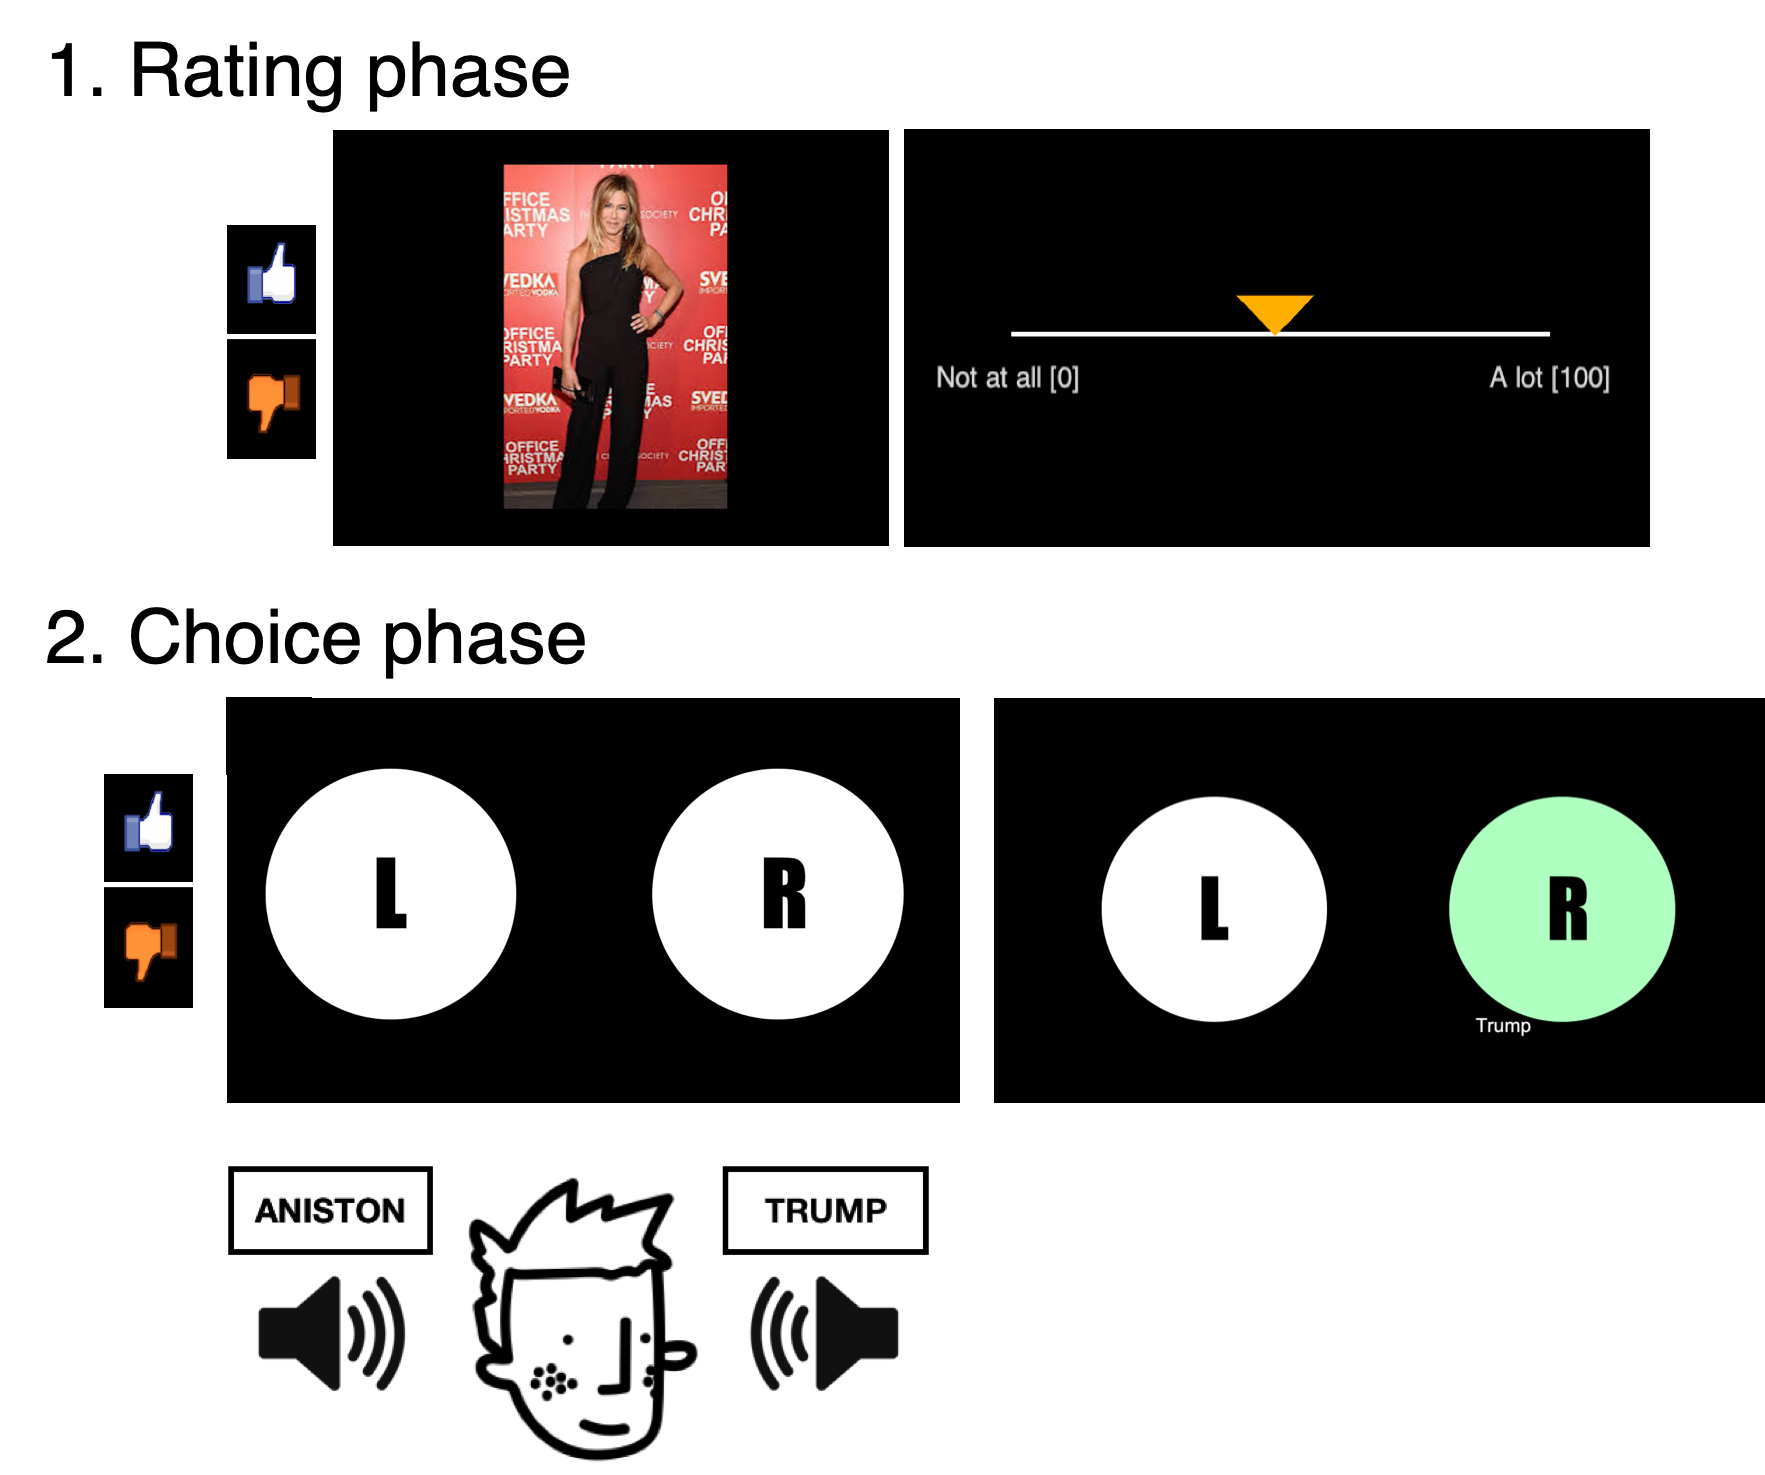

In [12]:
from IPython.display import Image
Image(filename='task_image.png')

## Load data participants

In [13]:
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots/Data/All/PFT_Choice_Pilot_All.csv') 
data_exp_ratings_2 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots/Data/All/PFT_idRatingsFrame_Pilot_All.csv') 

In [14]:
# Insert to exclude particitipants
excludedPart = []
for i in excludedPart:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[0 1 2 3 4 5 6 7 8]
Number of participants: 9


In [15]:
data_exp1.head()

trial  leftId  rightId  Frame   endTime  choice  choiceTime  LRat1  RRat1  \
0    0.0    21.0      4.0    2.0  7.508409     1.0    1.174838   50.0   28.5   
1    1.0    12.0     14.0    2.0  7.513930     1.0    0.780269   40.5   27.5   
2    2.0    20.0     19.0    2.0  7.515296     1.0    1.195317   50.0    8.0   
3    3.0     2.0      8.0    2.0  7.514498     1.0    0.247736   44.5   10.5   
4    4.0     4.0     21.0    1.0  7.514311     1.0    0.178482   28.5   50.0   

   LRat2  RRat2     LVar1     RVar1     LVar2      RVar2  Part  
0    1.5   20.5  0.000000  3.535534  0.707107   6.363961     0  
1   10.0   23.0  0.707107  2.121320  5.656854   4.242641     0  
2    1.0   41.0  0.000000  0.000000  0.000000  12.727922     0  
3    1.0   50.0  3.535534  3.535534  0.000000   0.000000     0  
4   20.5    1.5  3.535534  0.000000  6.363961   0.707107     0

In [16]:
data_exp_ratings_2.head()

nameId  rat1  rat2       var1       var2  Part
0    20.0  50.0   1.0   0.000000   0.000000     0
1    10.0  29.5  27.0   6.363961  12.727922     0
2     8.0  10.5  50.0   3.535534   0.000000     0
3    18.0  50.0   1.0   0.000000   0.000000     0
4     6.0  25.5   3.0  34.648232   2.828427     0

In [17]:
data_exp1=data_exp1.rename(index=str, columns={"choiceTime":"RT", })

## drop NaNs from choice rows

In [18]:
data_exp1 = data_exp1.dropna(axis = 0, how ='any') 
data_exp_ratings_2 = data_exp_ratings_2.dropna(axis = 0, how ='any') 

In [19]:
data_exp1 = data_exp1.reset_index()
data_exp_ratings_2 = data_exp_ratings_2.reset_index()

## add extra value information

In [20]:
data_exp1["TotVal1"] = data_exp1['RRat1']+ data_exp1['LRat1']
data_exp1["TotVal2"] = data_exp1['RRat2']+ data_exp1['LRat2']


data_exp1["DVal1"] = data_exp1['RRat1'] - data_exp1['LRat1']
data_exp1["absDVal1"] = np.abs(data_exp1["DVal1"] )

data_exp1["DVar1"] = data_exp1['RVar1'] - data_exp1['LVar1']
data_exp1["absDVar1"] = np.abs(data_exp1["DVar1"] )

data_exp1["DVal2"] = data_exp1['RRat2'] - data_exp1['LRat2']
data_exp1["absDVal2"] = np.abs(data_exp1["DVal2"] )

data_exp1["DVar2"] = data_exp1['RVar2'] - data_exp1['LVar2']
data_exp1["absDVar2"] = np.abs(data_exp1["DVar2"] )

## add z-scores

In [21]:
data_exp1["zDVal1"] = z_score1(data_exp1,'Part',"DVal1")
data_exp1["zabsDVal1"] = z_score1(data_exp1,'Part',"absDVal1")

data_exp1["zDVal2"] = z_score1(data_exp1,'Part',"DVal2")
data_exp1["zabsDVal2"] = z_score1(data_exp1,'Part',"absDVal2")

data_exp1["zDVar1"] = z_score1(data_exp1,'Part',"DVar1")
data_exp1["zabsDVar1"] = z_score1(data_exp1,'Part',"absDVar1")

data_exp1["zDVar2"] = z_score1(data_exp1,'Part',"DVar2")
data_exp1["zabsDVar2"] = z_score1(data_exp1,'Part',"absDVar2")

data_exp1["zTotVal1"] = z_score1(data_exp1,'Part',"TotVal1")
data_exp1["zTotVal2"] = z_score1(data_exp1,'Part',"TotVal2")
data_exp1["zRT"] = z_score1(data_exp1,'Part',"RT")

In [22]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.Frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.Frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct"] = Correct

## change choices from -1 to 0 for left

In [23]:
choices = []
for i in range(len(data_exp1)):
        if (data_exp1.choice[i] == 1):
            choices.append(1)
        else:
            choices.append(0)

data_exp1["choices"] = choices

# Ratings data analysis
----------------------------------------
## by rating I refer to the value assigned to each celebrity in like (FRAME 1) and dislile (FRAME 2)

## 1. Data visualization

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


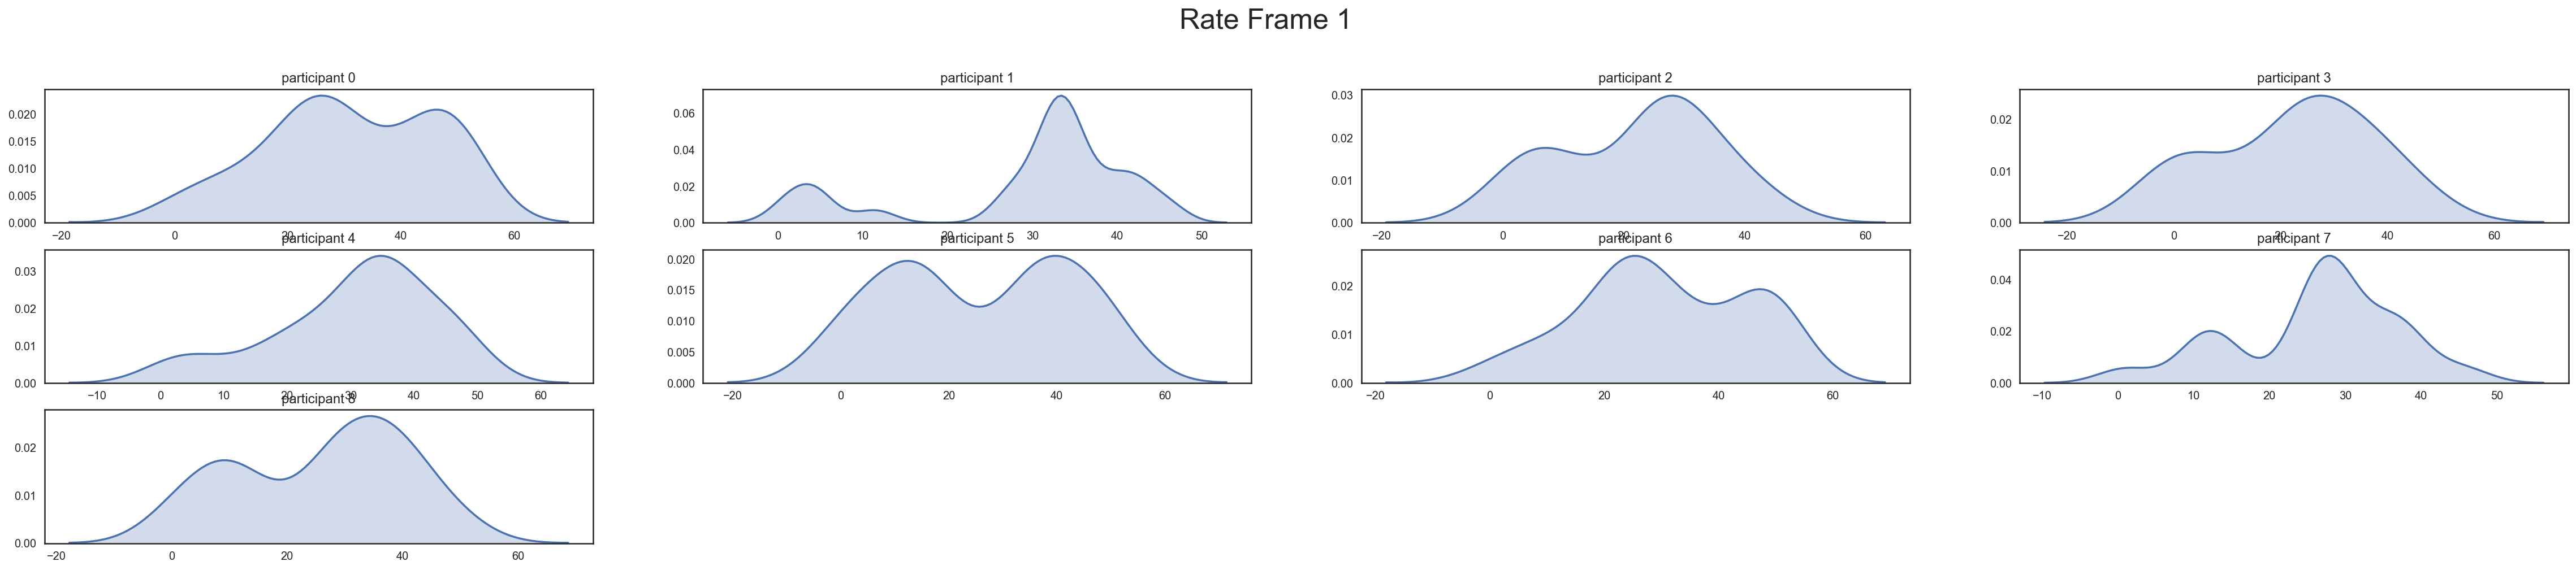

In [24]:
participant_densities(data_exp1,'RRat1', title = 'Rate Frame 1')

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


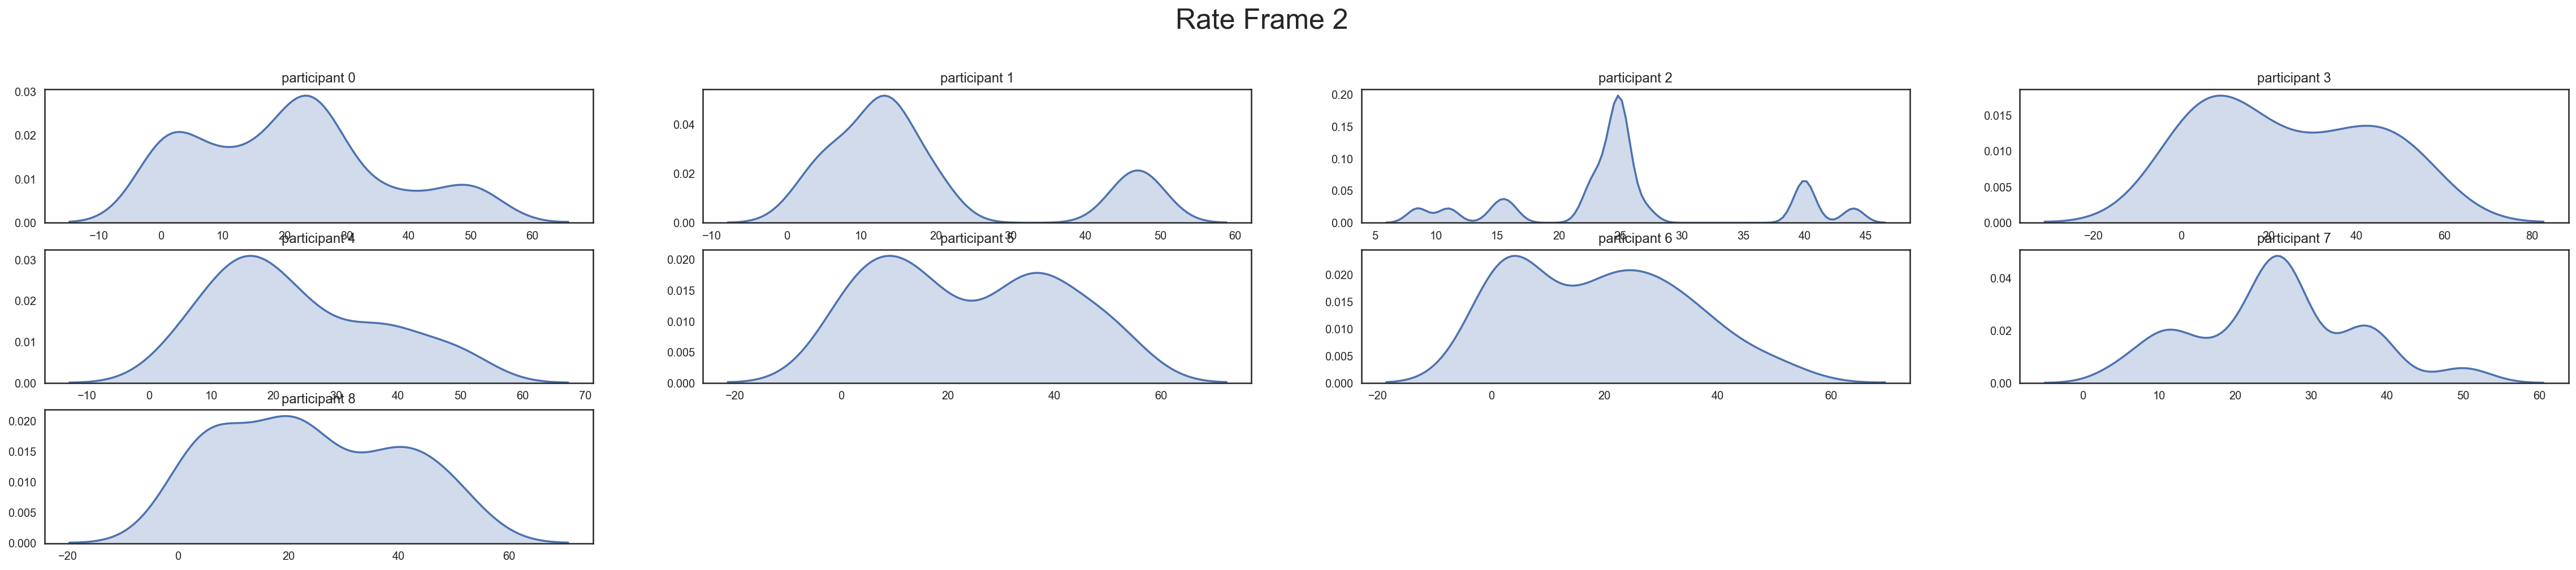

In [25]:
participant_densities(data_exp1,'RRat2', title = 'Rate Frame 2 ')

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


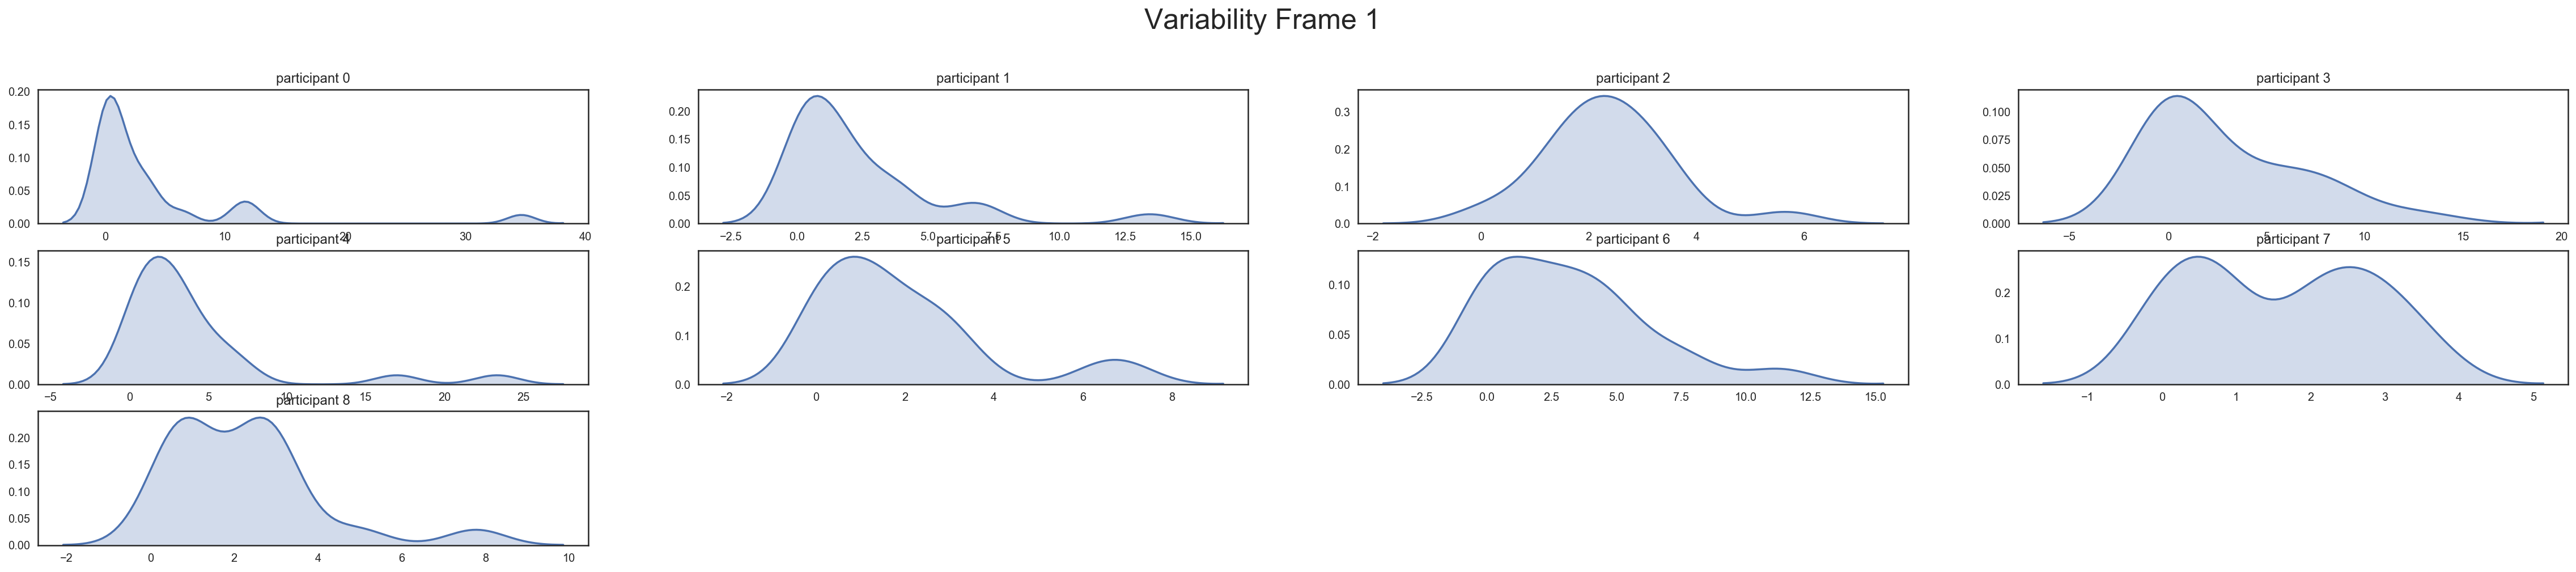

In [26]:
participant_densities(data_exp1,'RVar1', title = 'Variability Frame 1')

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


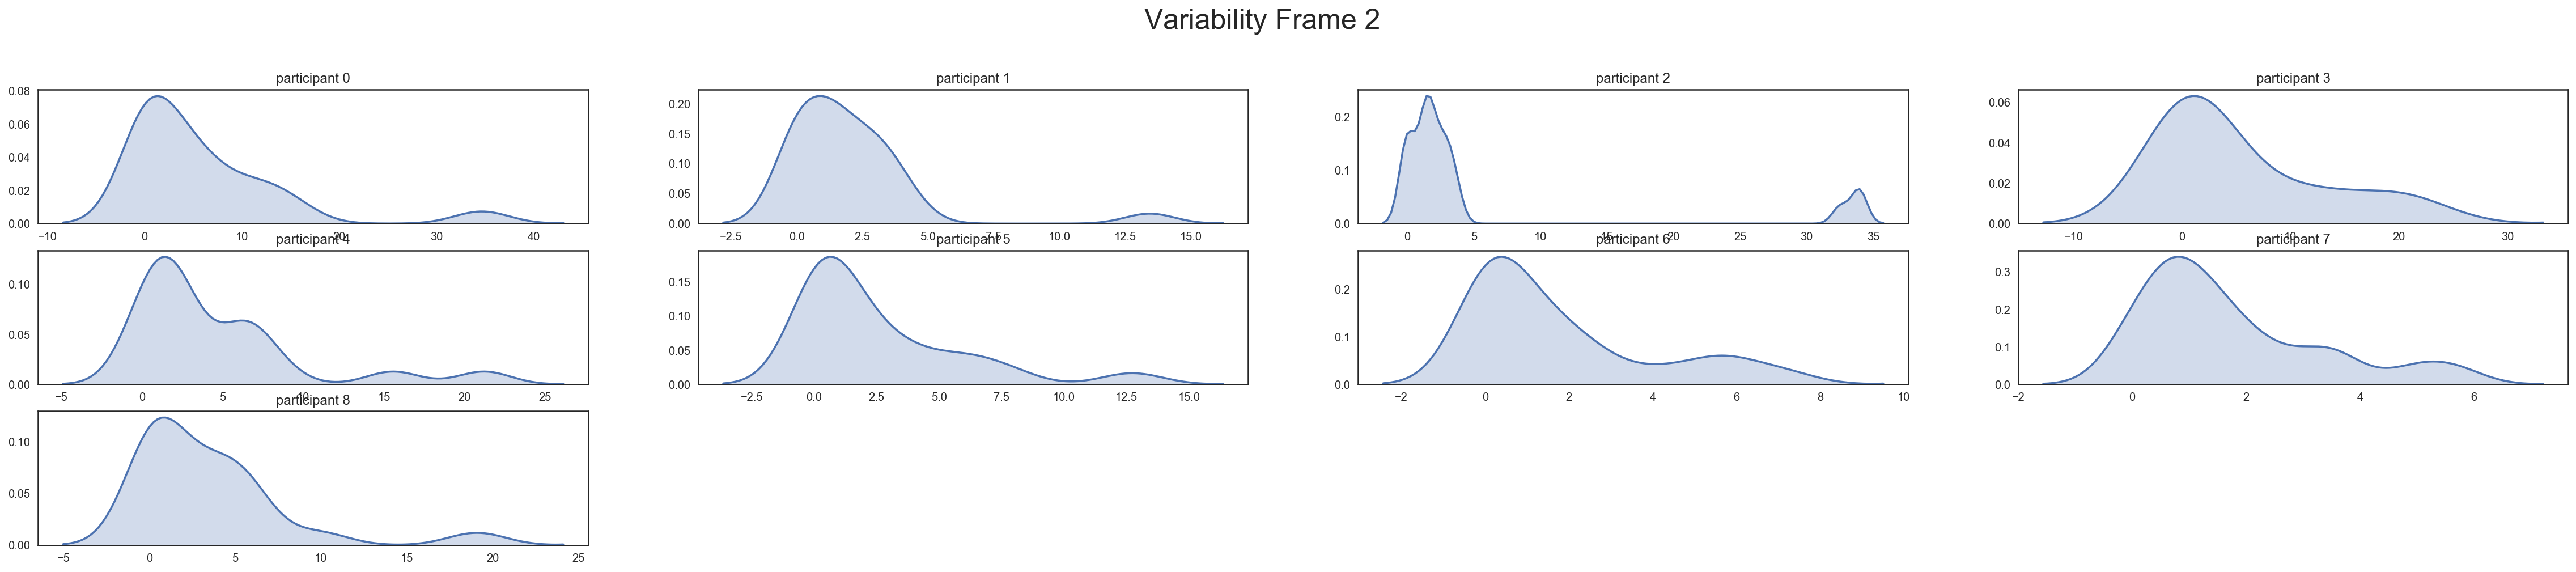

In [27]:
participant_densities(data_exp1,'RVar2', title = 'Variability Frame 2')

## 2.  Items ratings in both frames

Pearson's r = -0.903 p =  0.0


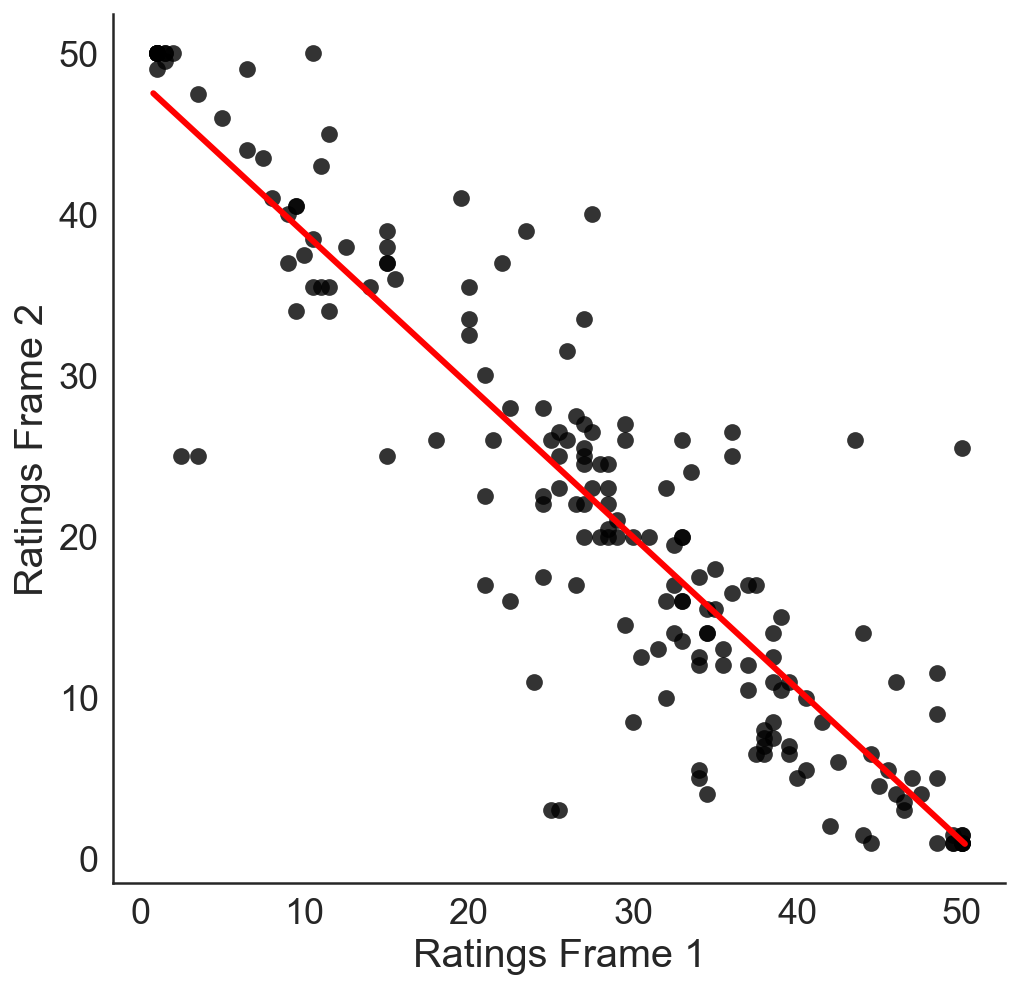

In [28]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Ratings Frame 1','rat2','Ratings Frame 2')

Pearson's r = 0.103 p =  0.167


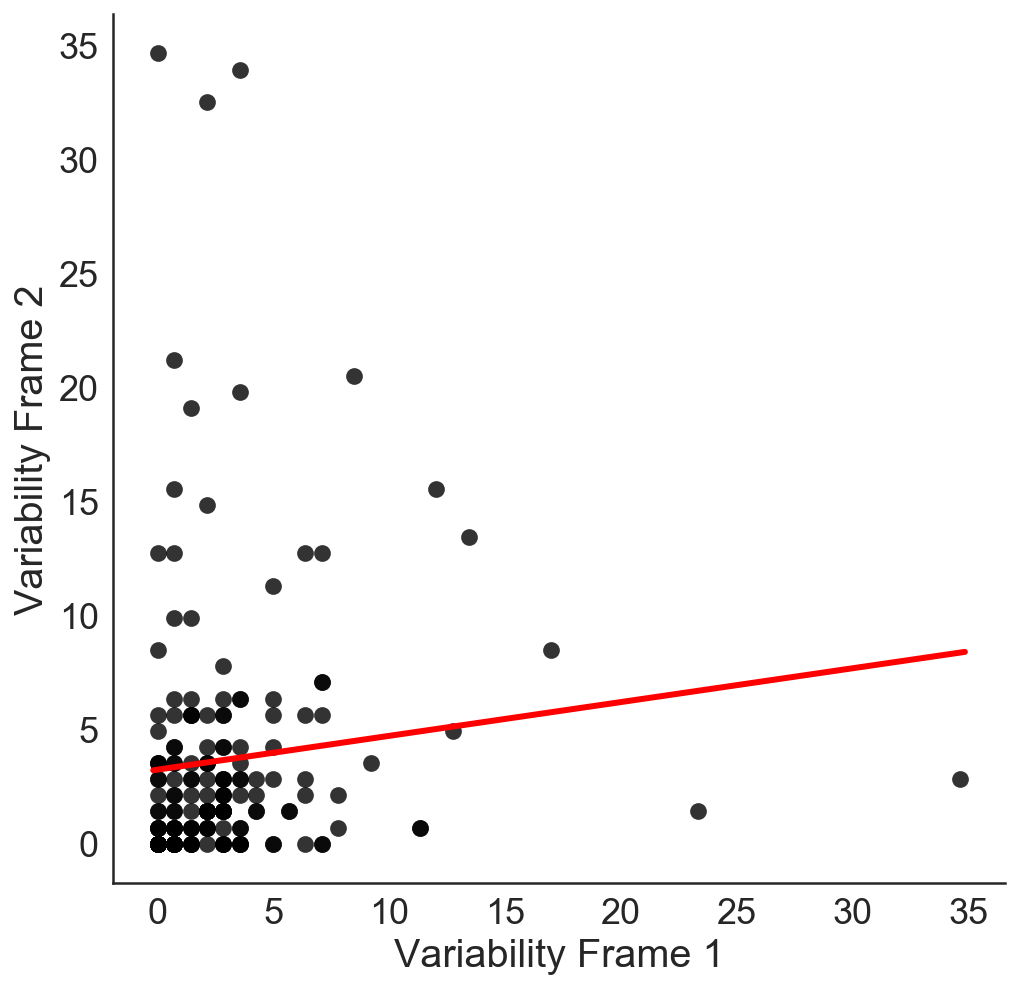

In [29]:
corrPlotSimple(data_exp_ratings_2, 'var1','Variability Frame 1','var2','Variability Frame 2')

## 3. Relationship between rating and variability. Notice that for rating, the range [0 - 50] the value 25 corresponds to indifference between like and dislike 

Pearson's r = 0.015 p =  0.837


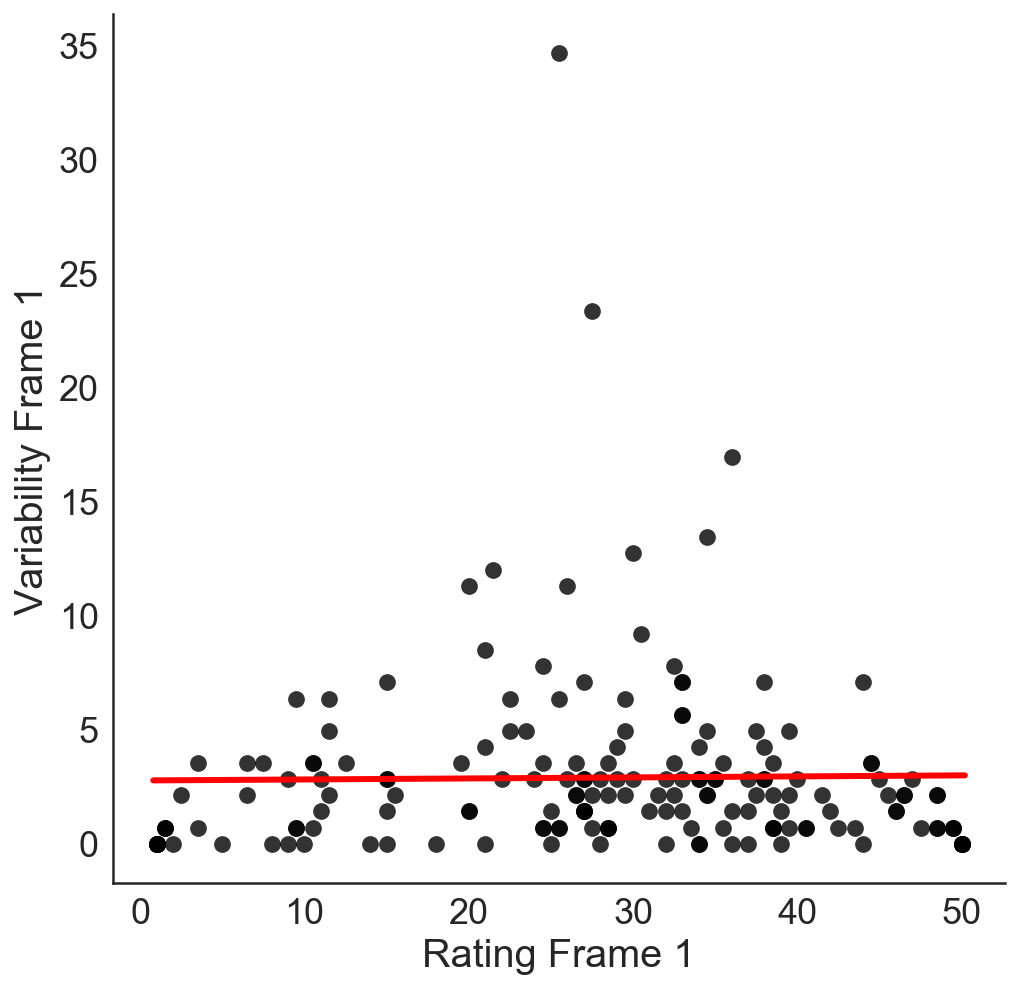

In [30]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Rating Frame 1','var1','Variability Frame 1')

Pearson's r = 0.018 p =  0.808


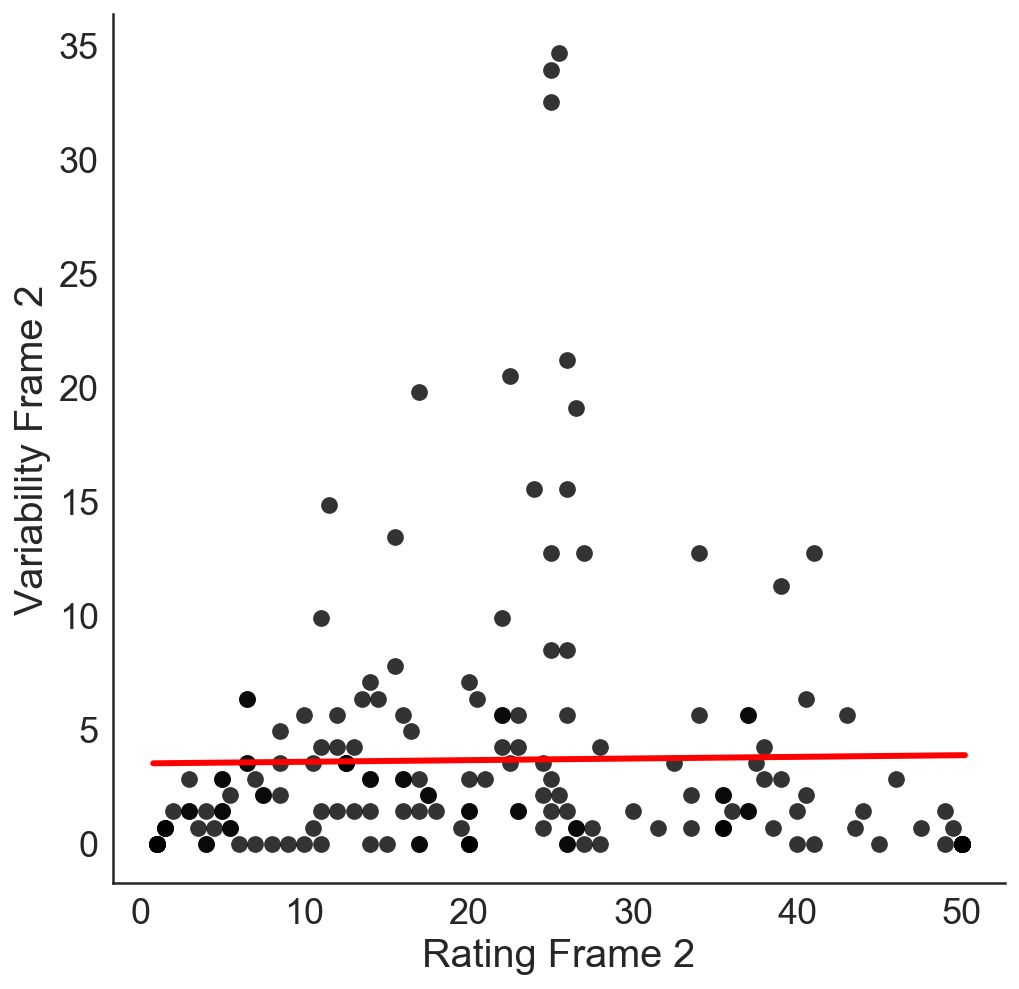

In [31]:
corrPlotSimple(data_exp_ratings_2, 'rat2','Rating Frame 2','var2','Variability Frame 2')

## 4. I create an index of partiallity ( how much I like/dislike something, with 0 representing indifference and 25 representing absolute like/dislike for that celebrity)

In [32]:
# if we adapt the rating scale to leave value 25 at the center of the scale (0) we can characterize the level of indifference that the celebrity generates
data_exp_ratings_2['partiality1'] = np.abs(data_exp_ratings_2.rat1-25)
data_exp_ratings_2['partiality2'] = np.abs(data_exp_ratings_2.rat2-25)

Pearson's r = -0.339 p =  0.0
Pearson's r = -0.411 p =  0.0


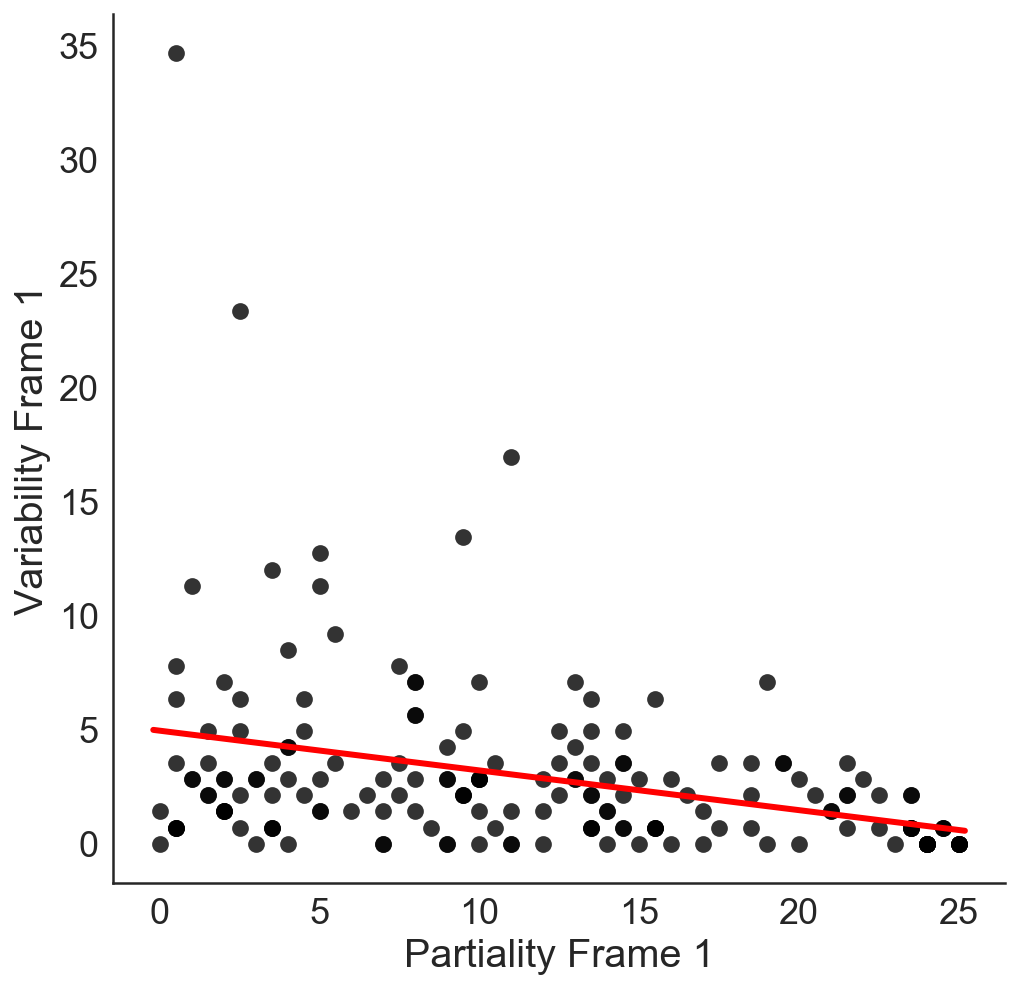

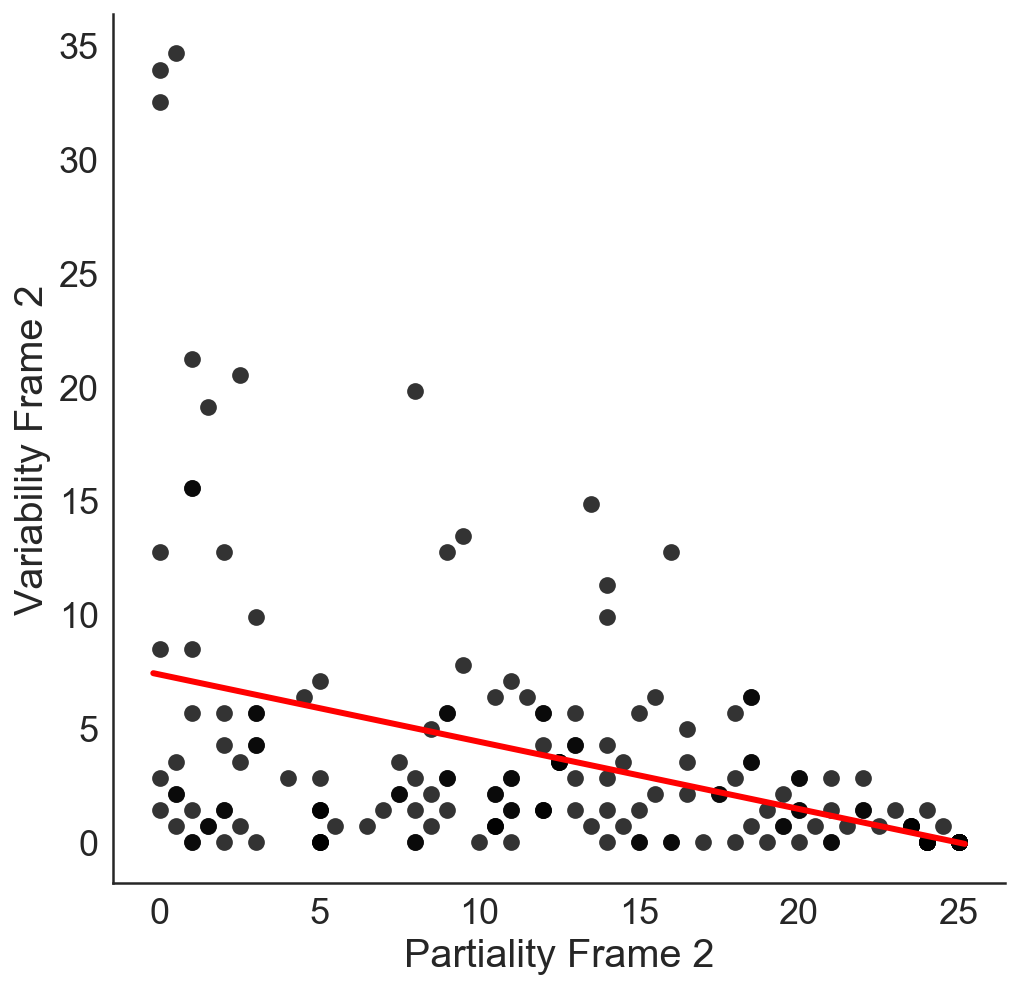

In [33]:
corrPlotSimple(data_exp_ratings_2, 'partiality1','Partiality Frame 1','var1','Variability Frame 1')
corrPlotSimple(data_exp_ratings_2, 'partiality2','Partiality Frame 2','var2','Variability Frame 2')

### Using the ratings given in like and dislike frame I found that variability in rating is higher in celebrities that that generate more indiffence in the participants.

## 5. Example ratings for each celebrity in one participant

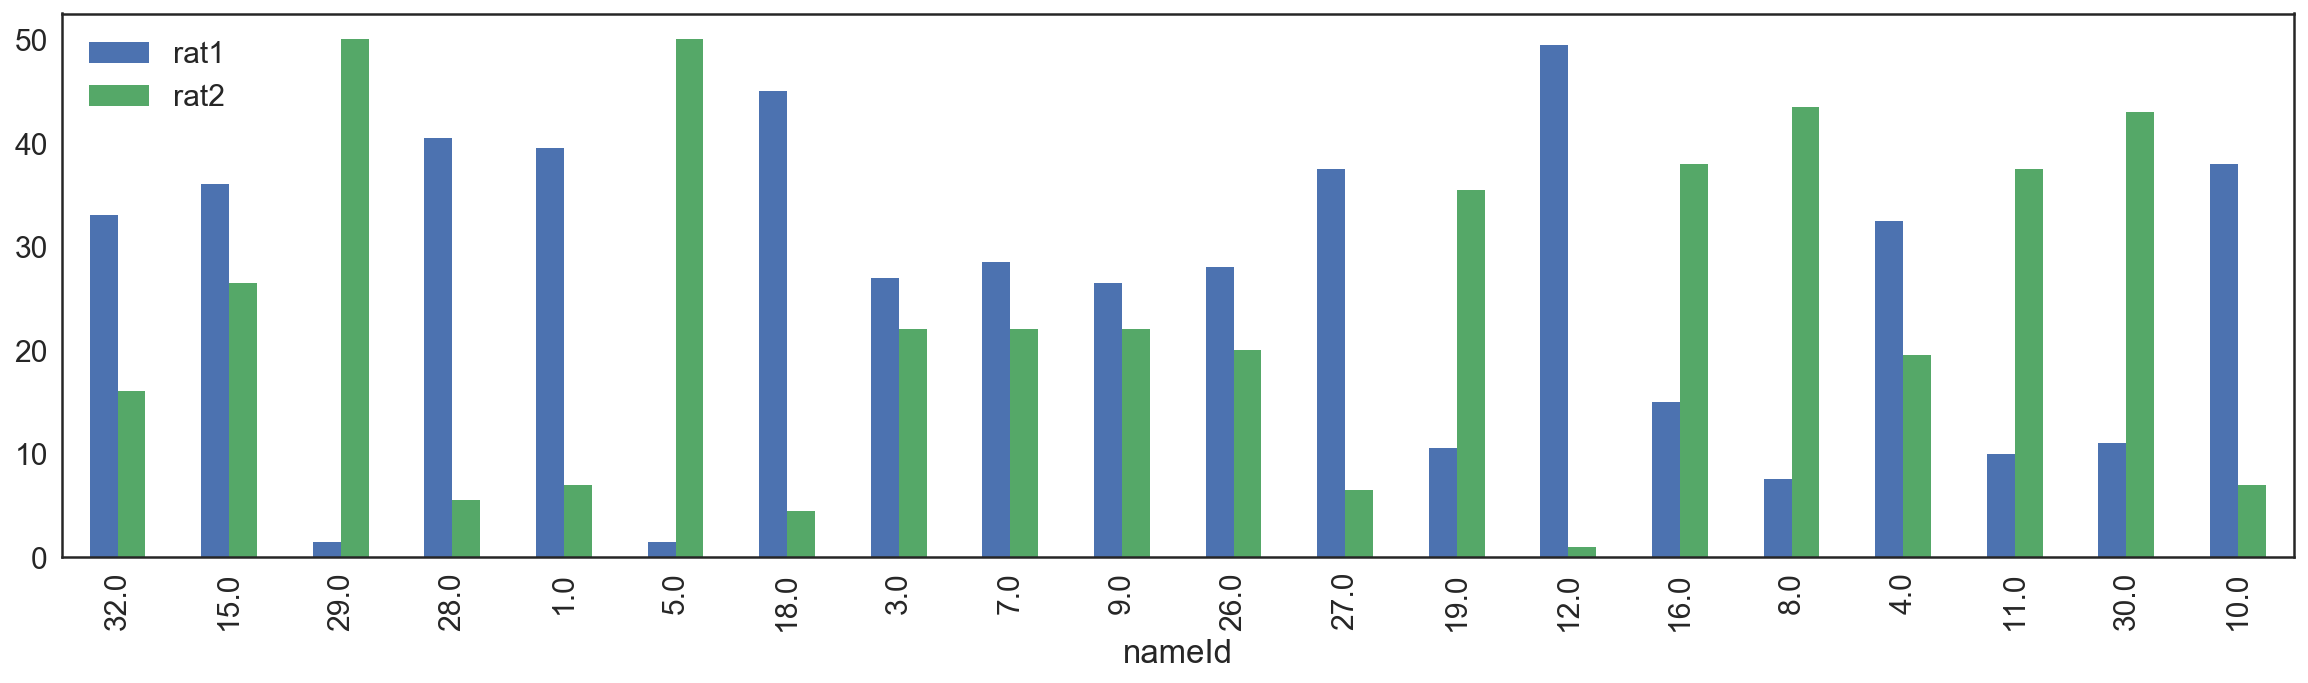

In [69]:
data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 8)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5))

## 6. Example ratings  for each celebrity for all participants

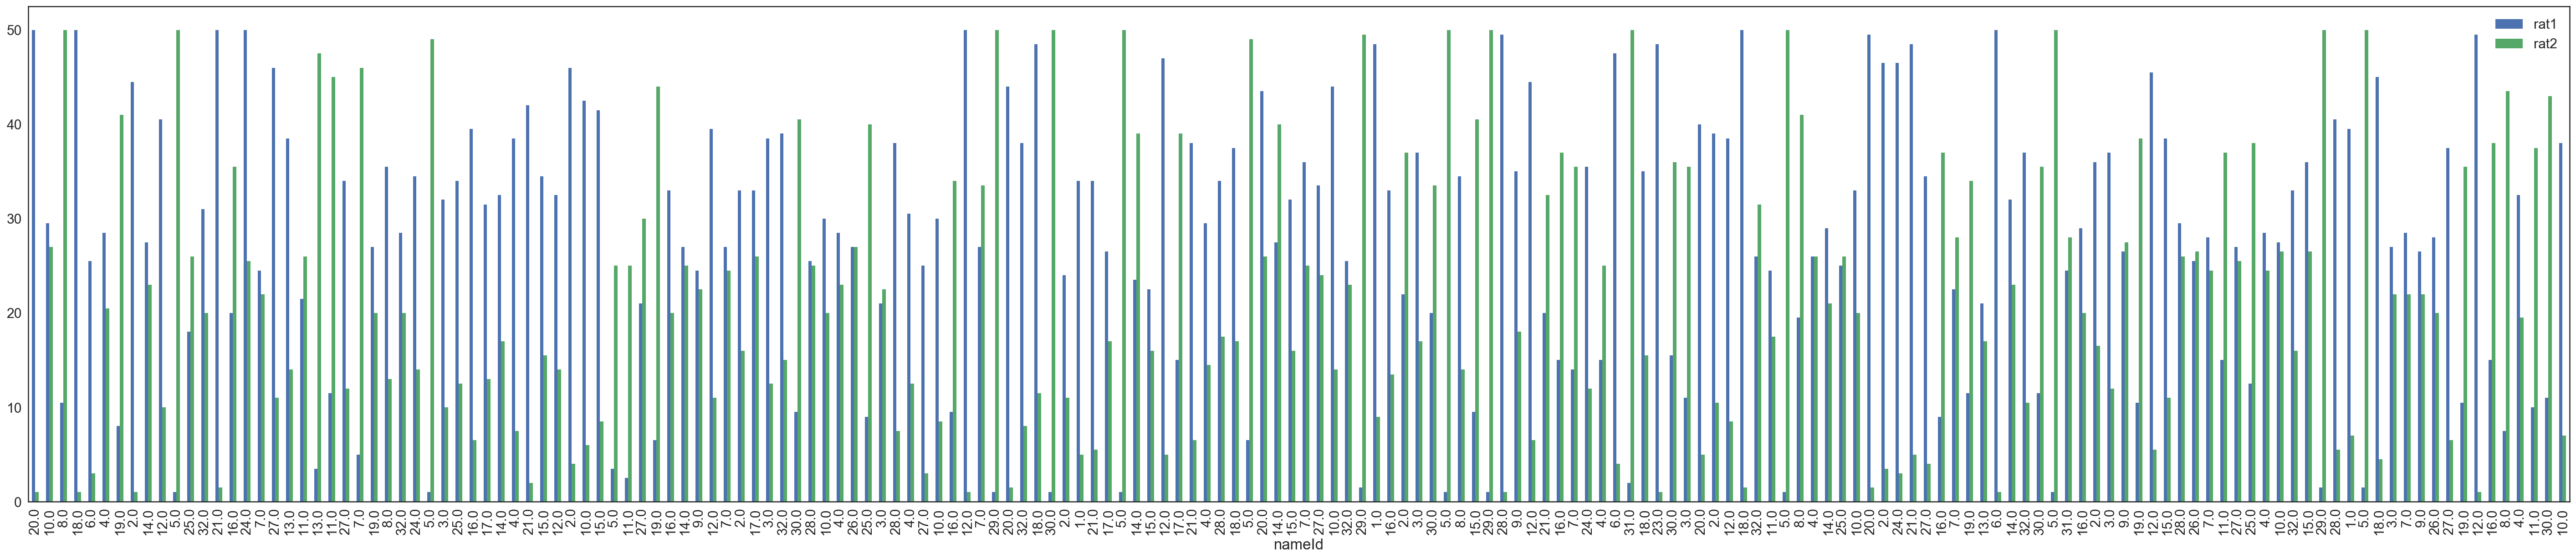

In [70]:
data_exp_ratings_2.plot.bar(x='nameId',y=['rat1','rat2'], figsize=(50,10))

#  Choice data analysis
-----------------------------------------------------------------------

## 1. Data visualization

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


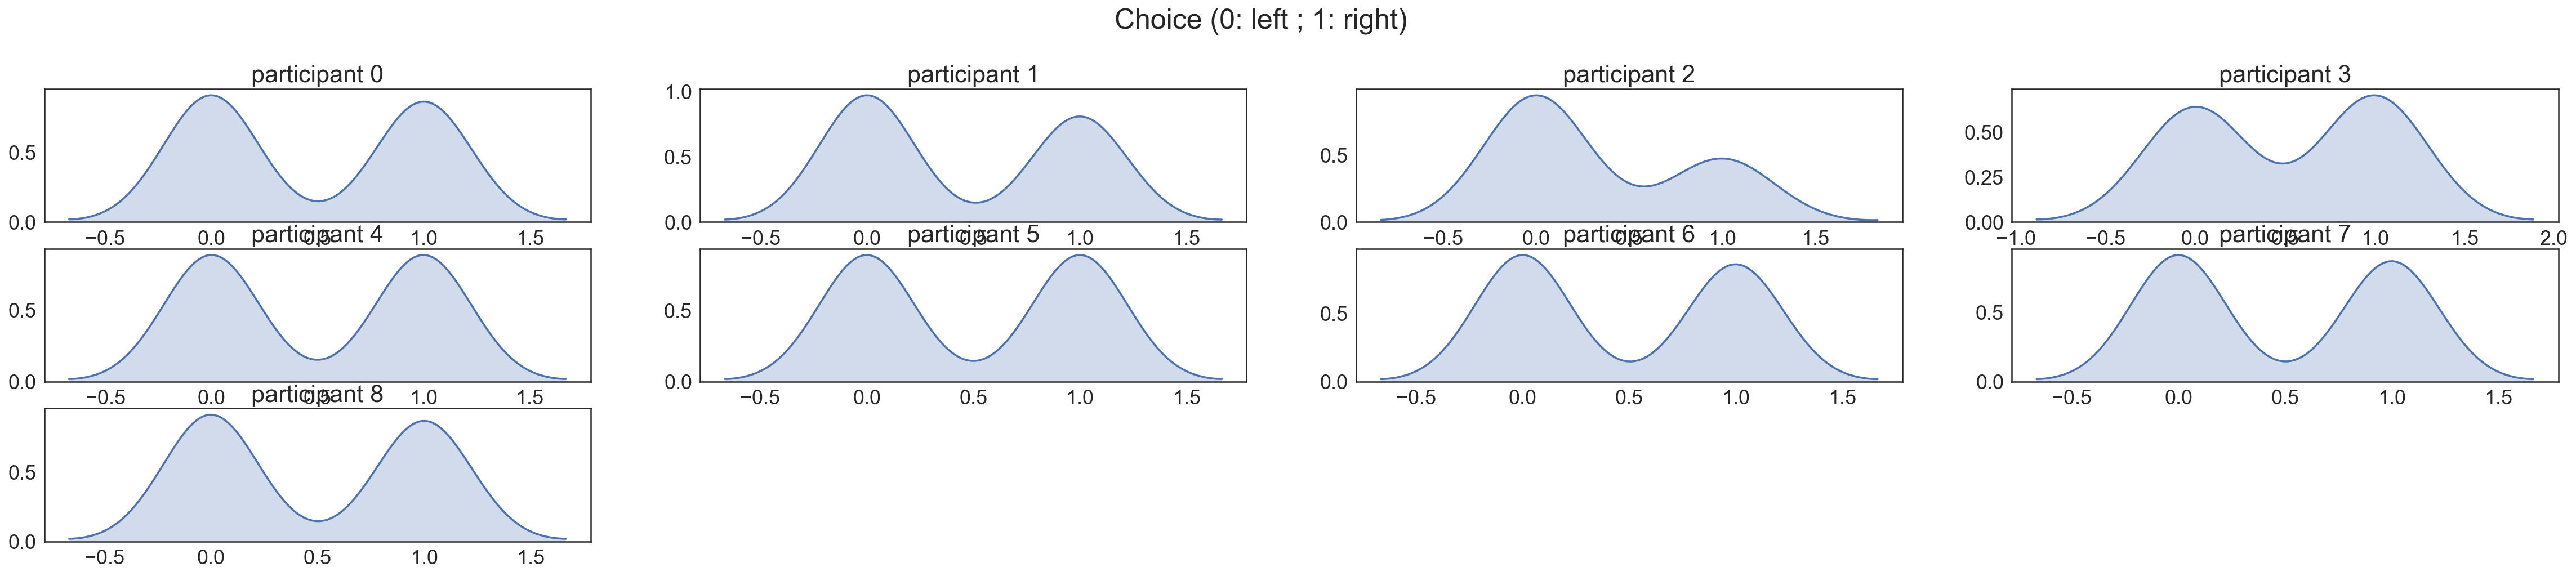

In [36]:
participant_densities(data_exp1,'choices', title = 'Choice (0: left ; 1: right)')

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


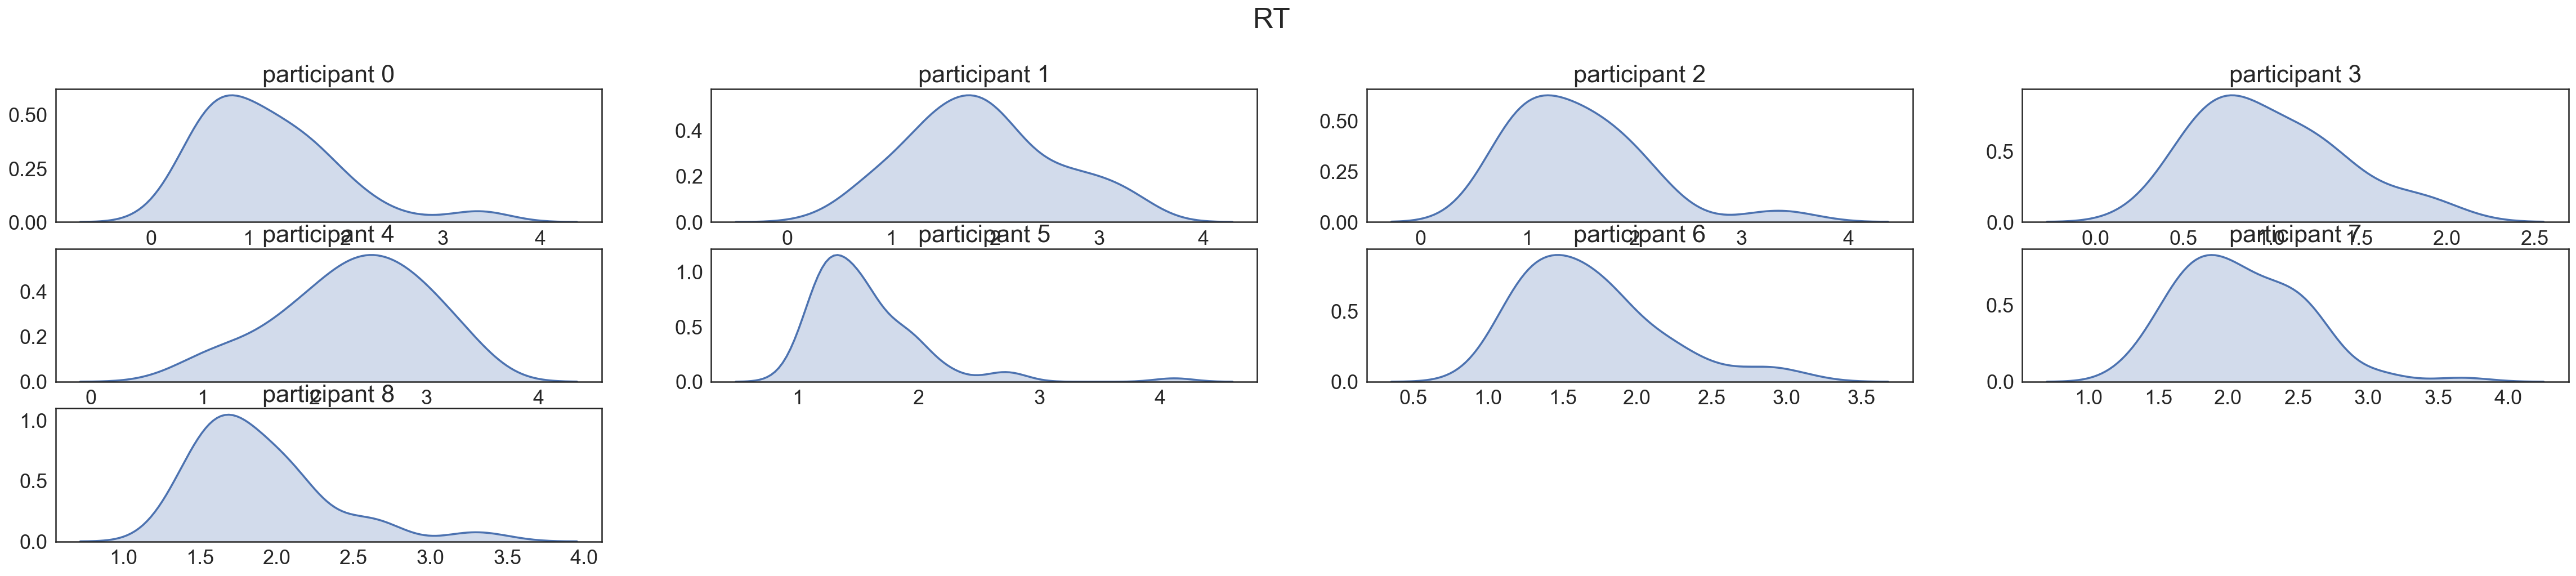

In [37]:
participant_densities(data_exp1,'RT',title = 'RT')

/Users/pradyumna/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


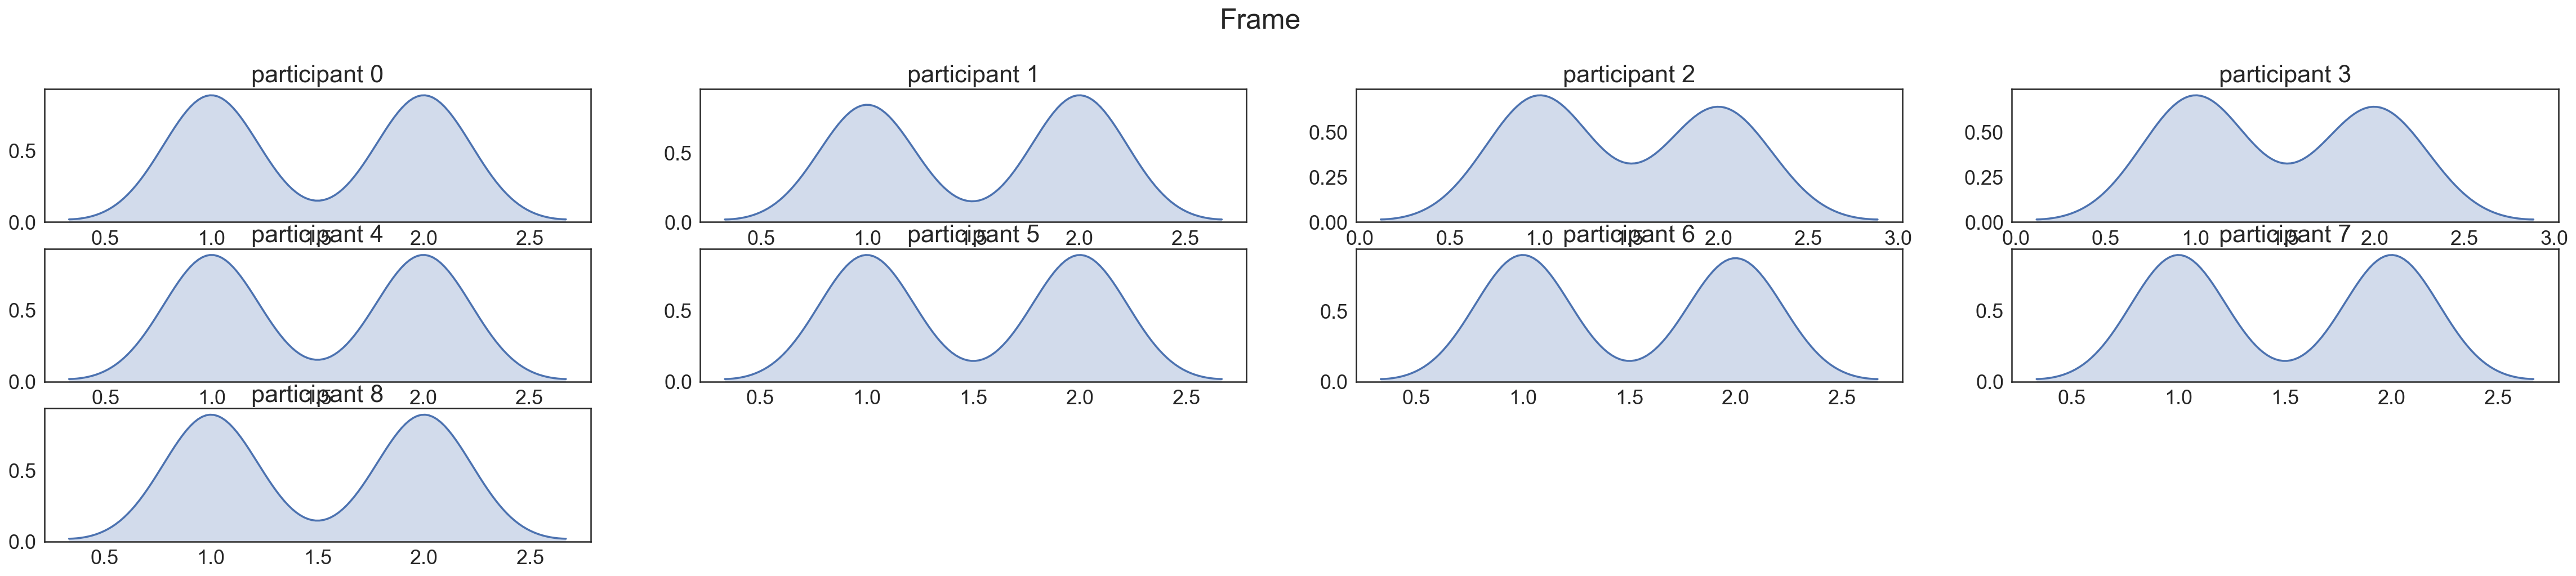

In [38]:
participant_densities(data_exp1,'Frame',title = 'Frame')

#### This plot is just to check if I am presenting a comparable number of trials for each frames (in some cases is different because participants can miss the response)

## 2. Accuracy per participant

In [39]:
accuracies = pd.DataFrame( columns = [])

In [40]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    accuracy_like.append(data_exp1.loc[(data_exp1['Frame'] == 1) & (data_exp1['Part'] == i)].correct.mean())
    accuracy_dislike.append(data_exp1.loc[(data_exp1['Frame'] == 2) & (data_exp1['Part'] == i)].correct.mean())

accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike

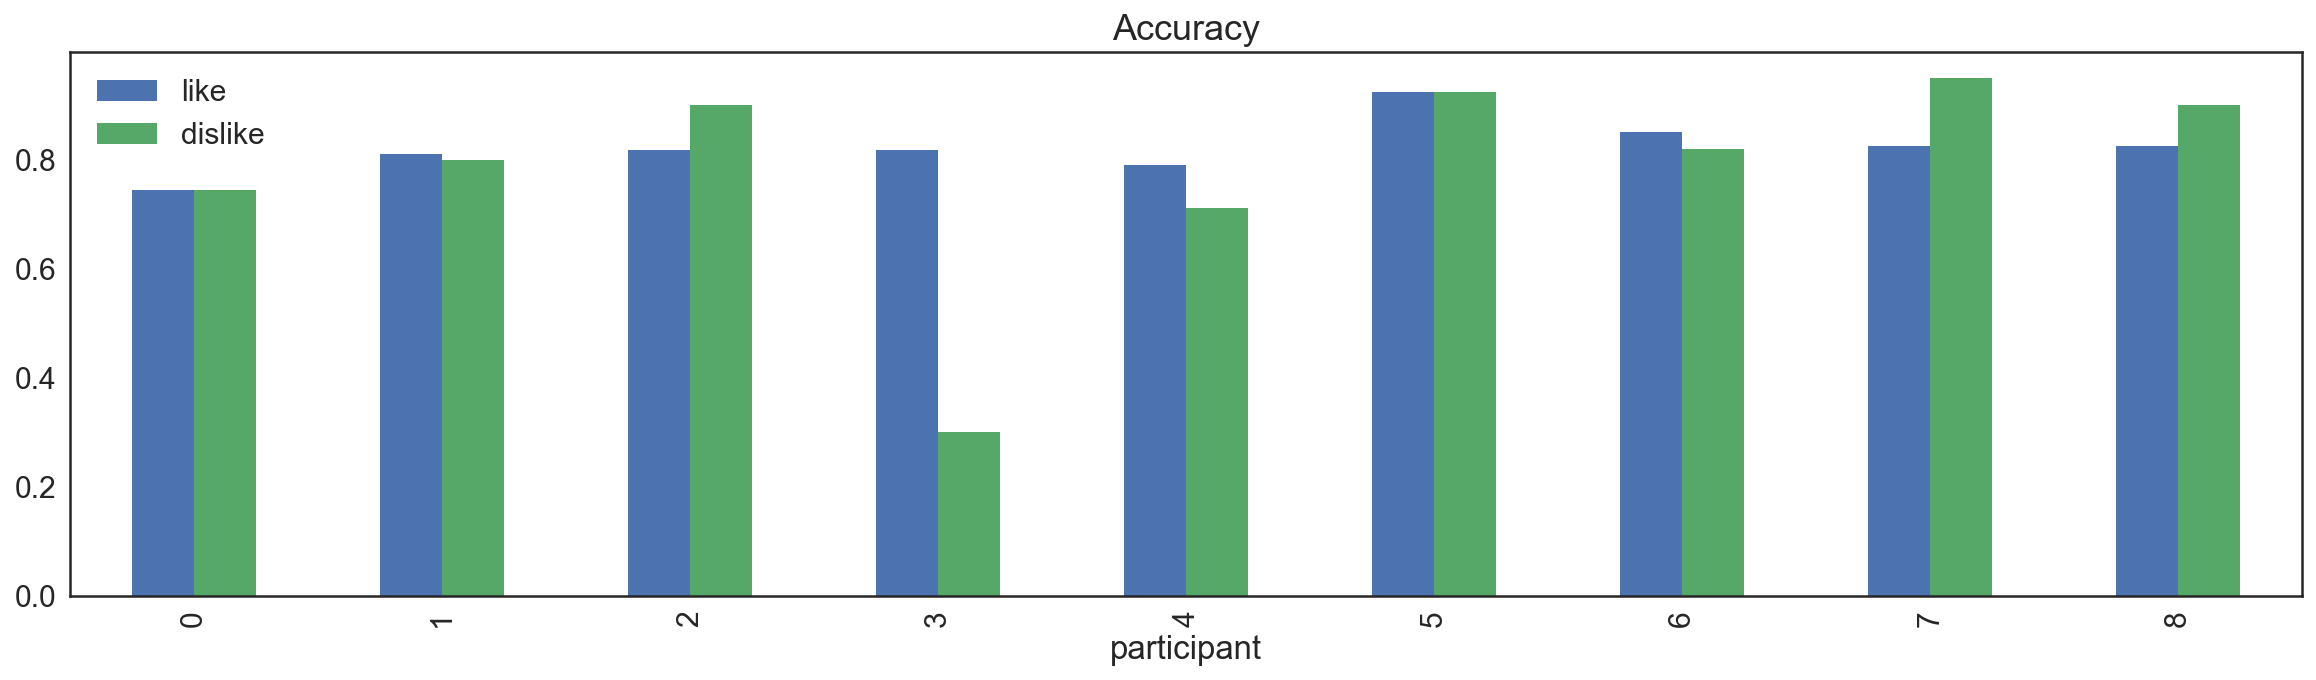

In [71]:
accuracies.plot.bar(x='participant',y=['like','dislike'], figsize=(20,5),title = 'Accuracy')

## Split dataframe for like and dislike

In [43]:
data_expL = data_exp1.loc[(data_exp1['Frame'] == 1)] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[(data_exp1['Frame'] == 2)] # 1 = Like, 2 = Dislike

In [44]:
#data_expL = data_exp1.loc[(data_exp1['Frame'] == 1) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike
#data_expD = data_exp1.loc[(data_exp1['Frame'] == 2) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike

## 3. Relationship between RT and |DV| (using ratings given in LIKE frame)

Pearson's r = -0.243 p =  0.0


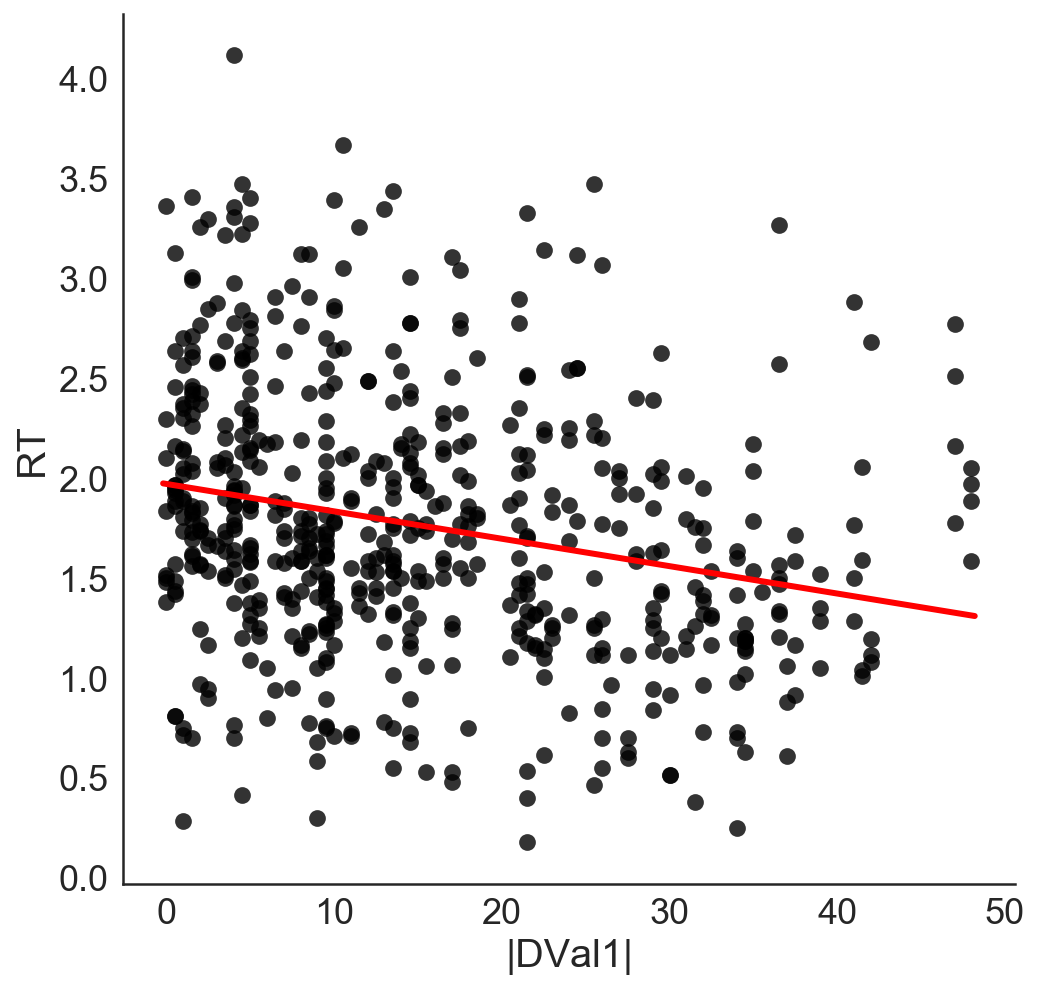

In [45]:
corrPlotSimple(data_exp1, 'absDVal1','|DVal1|','RT','RT')

## 4. Logistic plots for choice in like and dislike frames

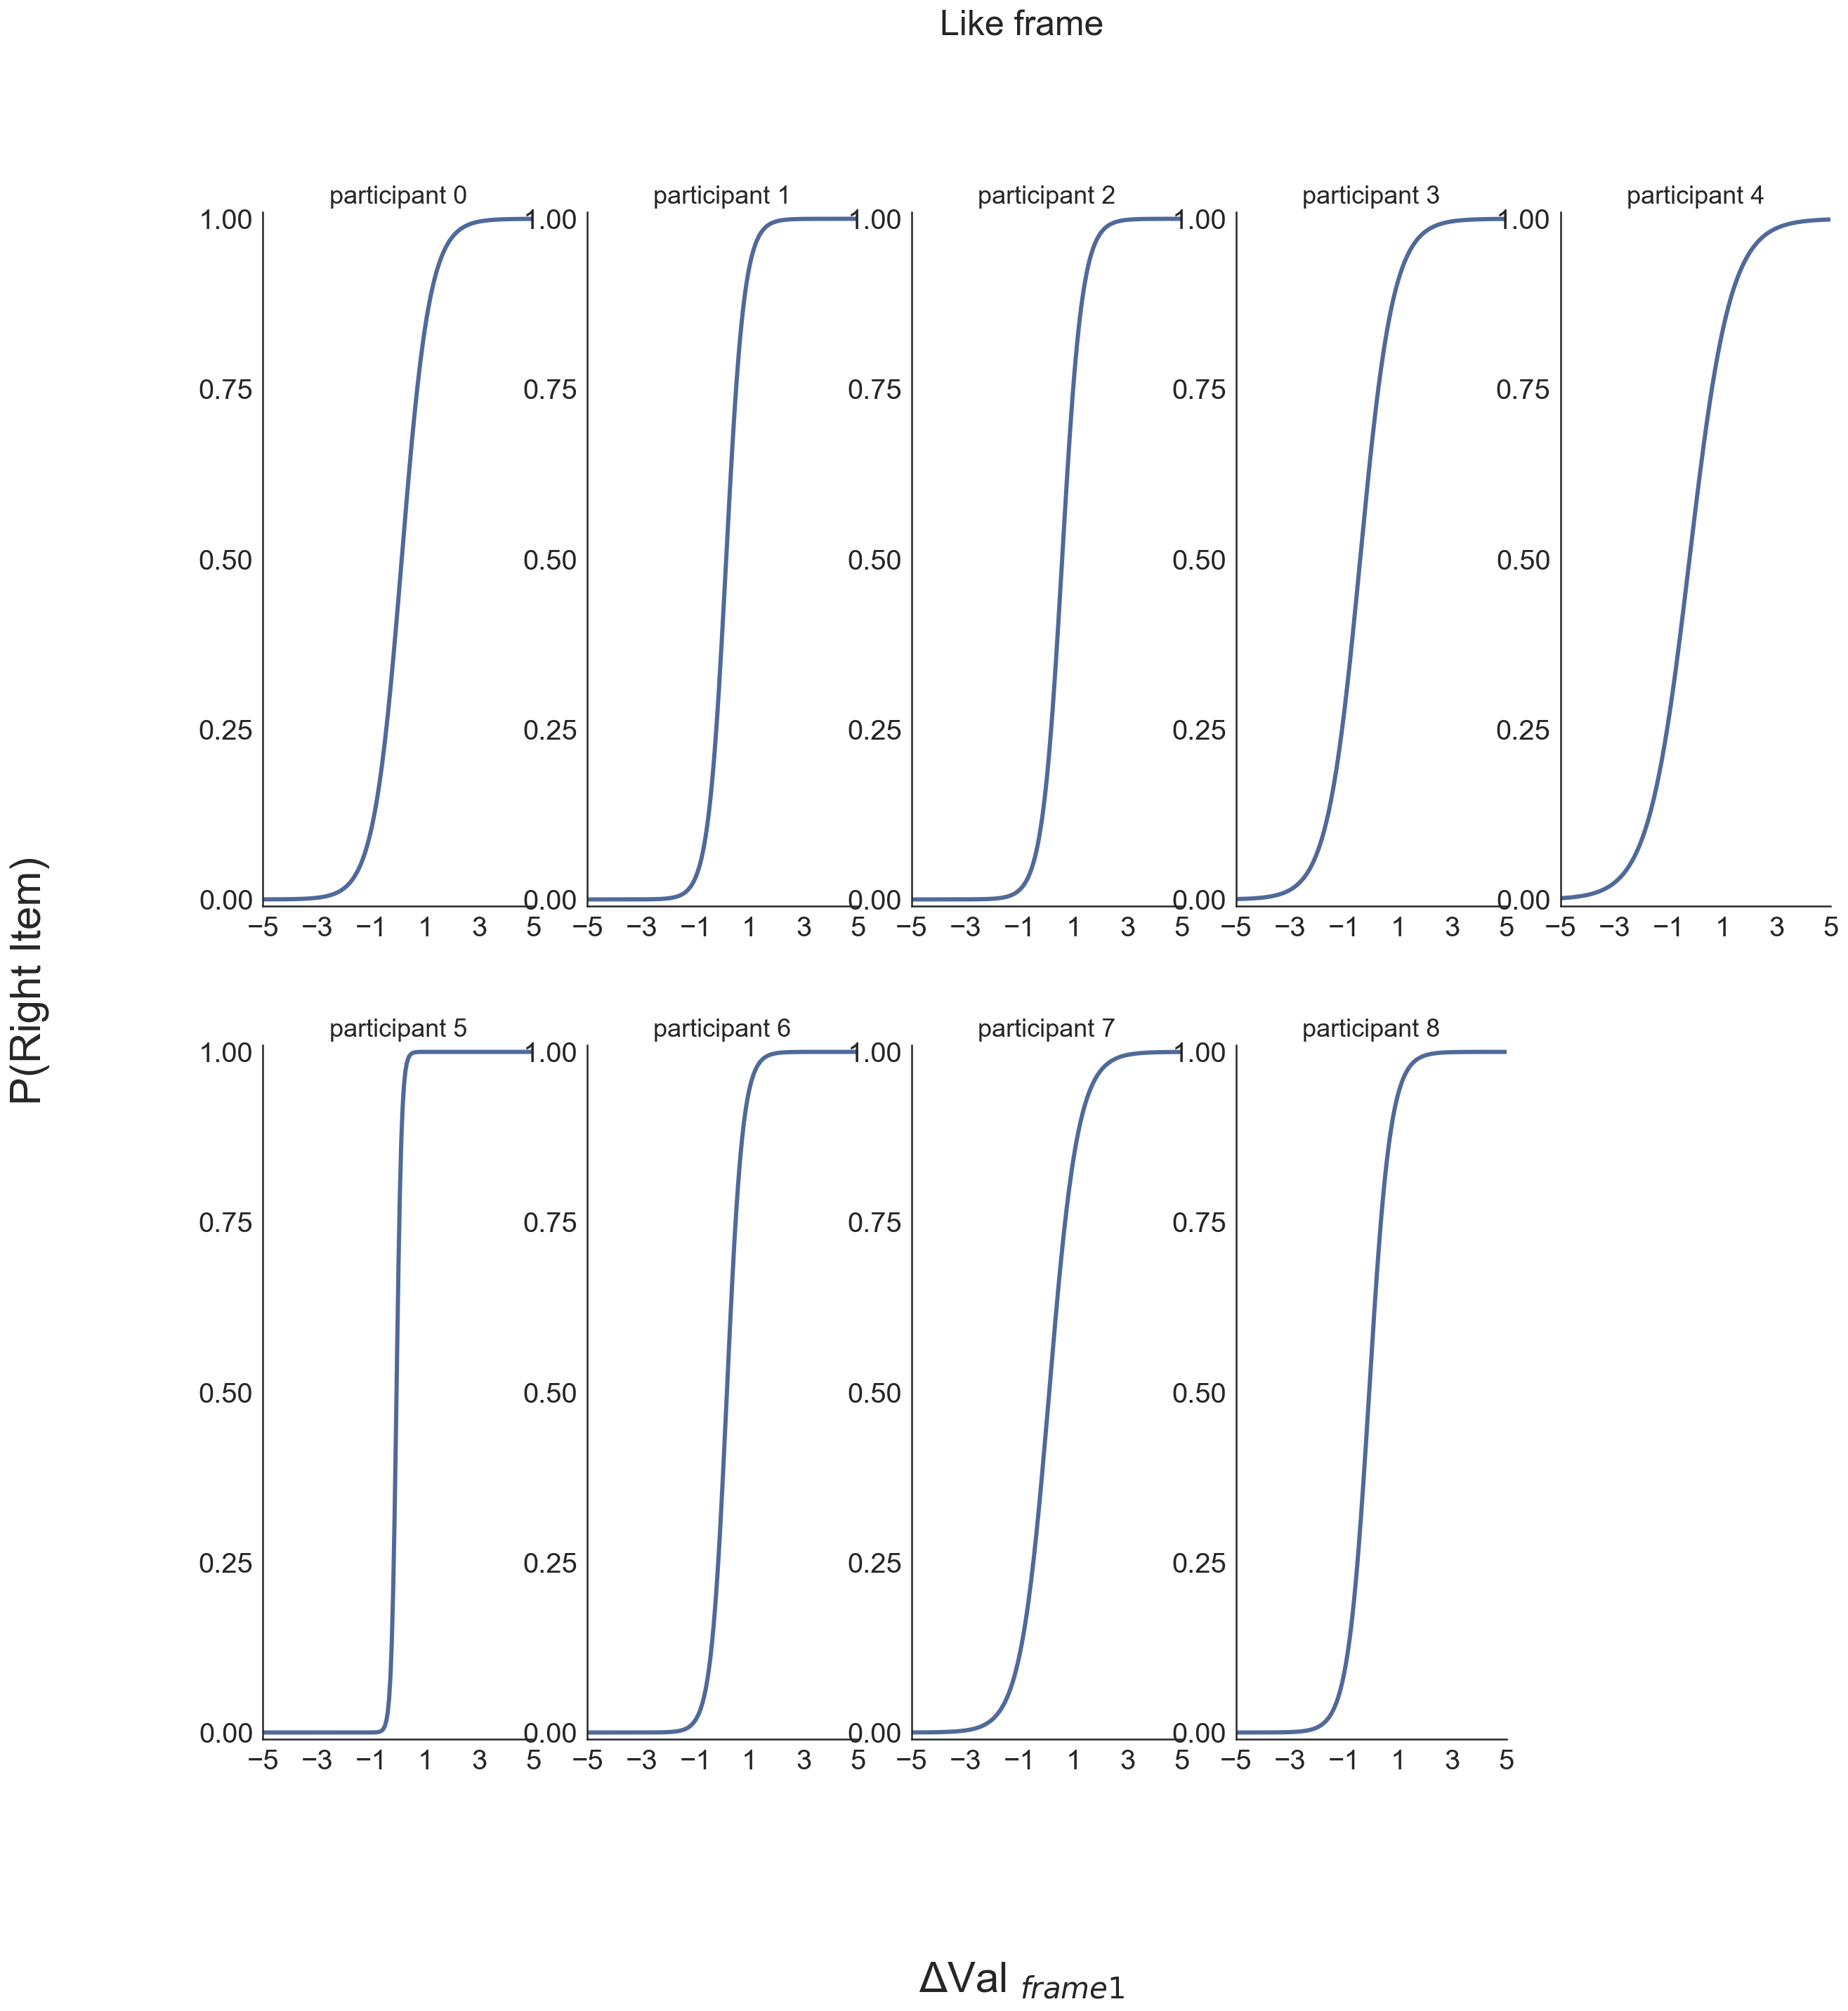

In [46]:

logisticplot_all_part( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')

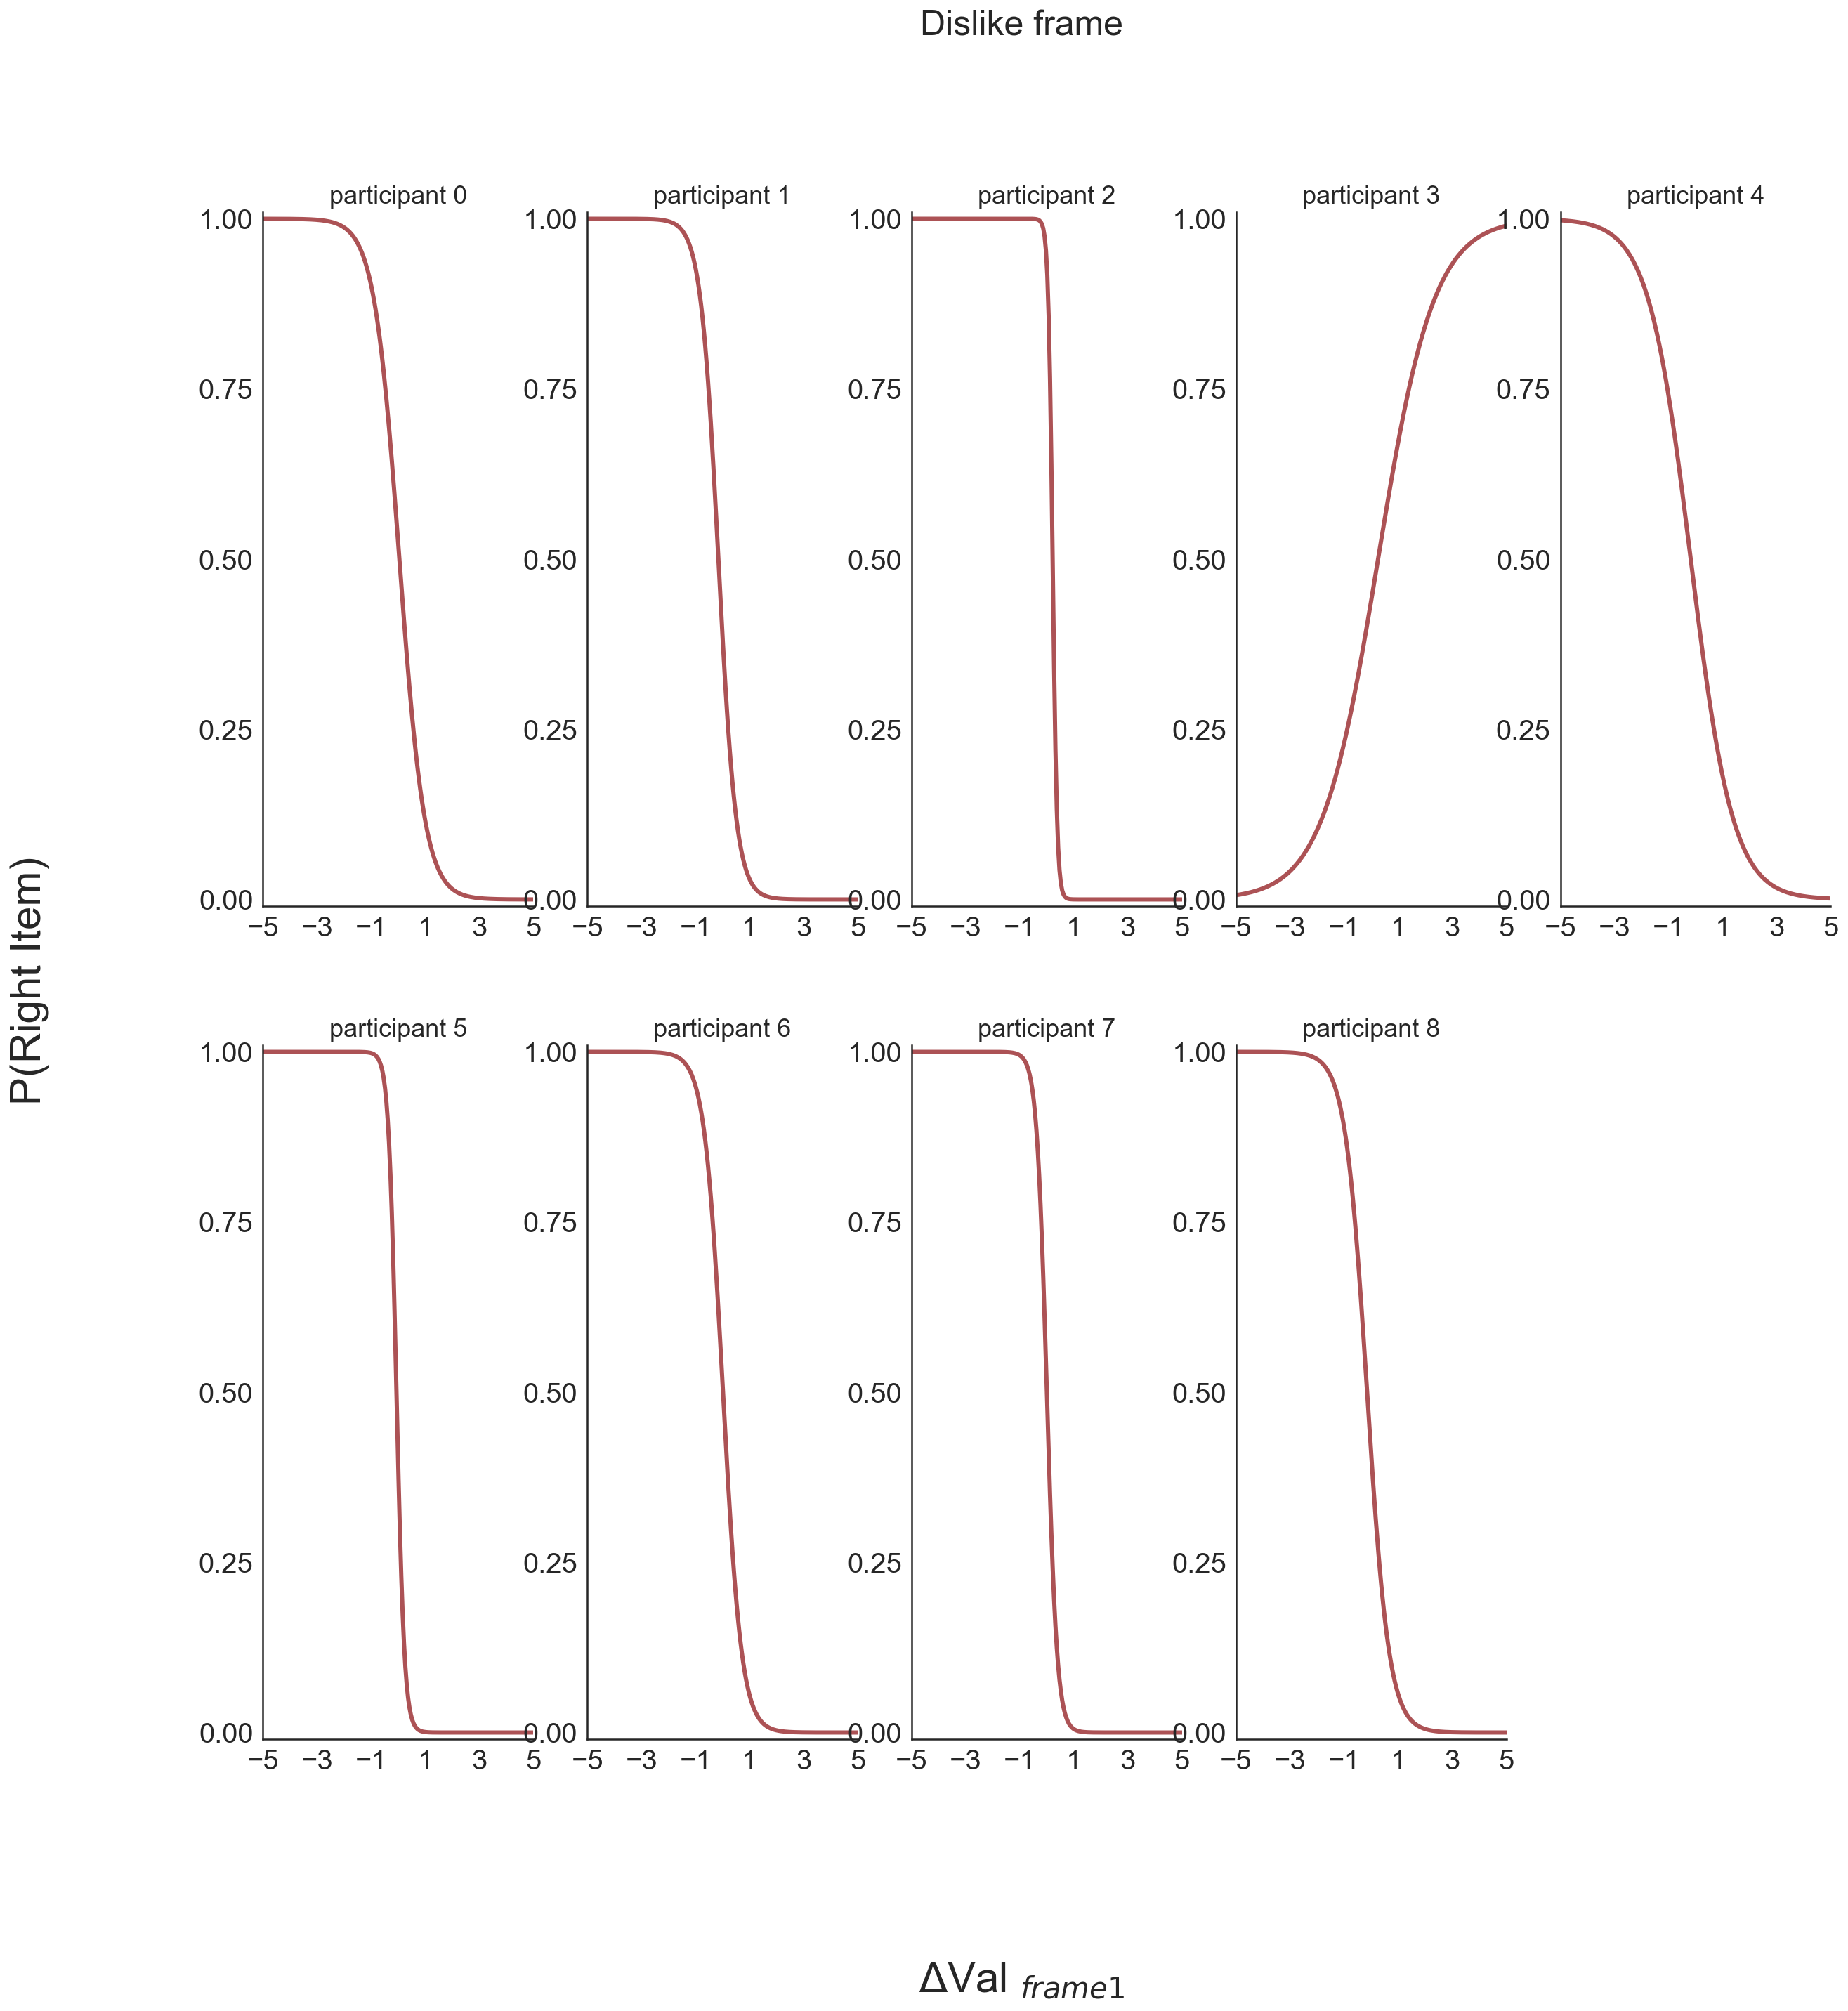

In [47]:
logisticplot_all_part( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

#### Looks like participant 3 did not responded following the change to dislike frame

## 5. Considering logistics plots aggregating all participants

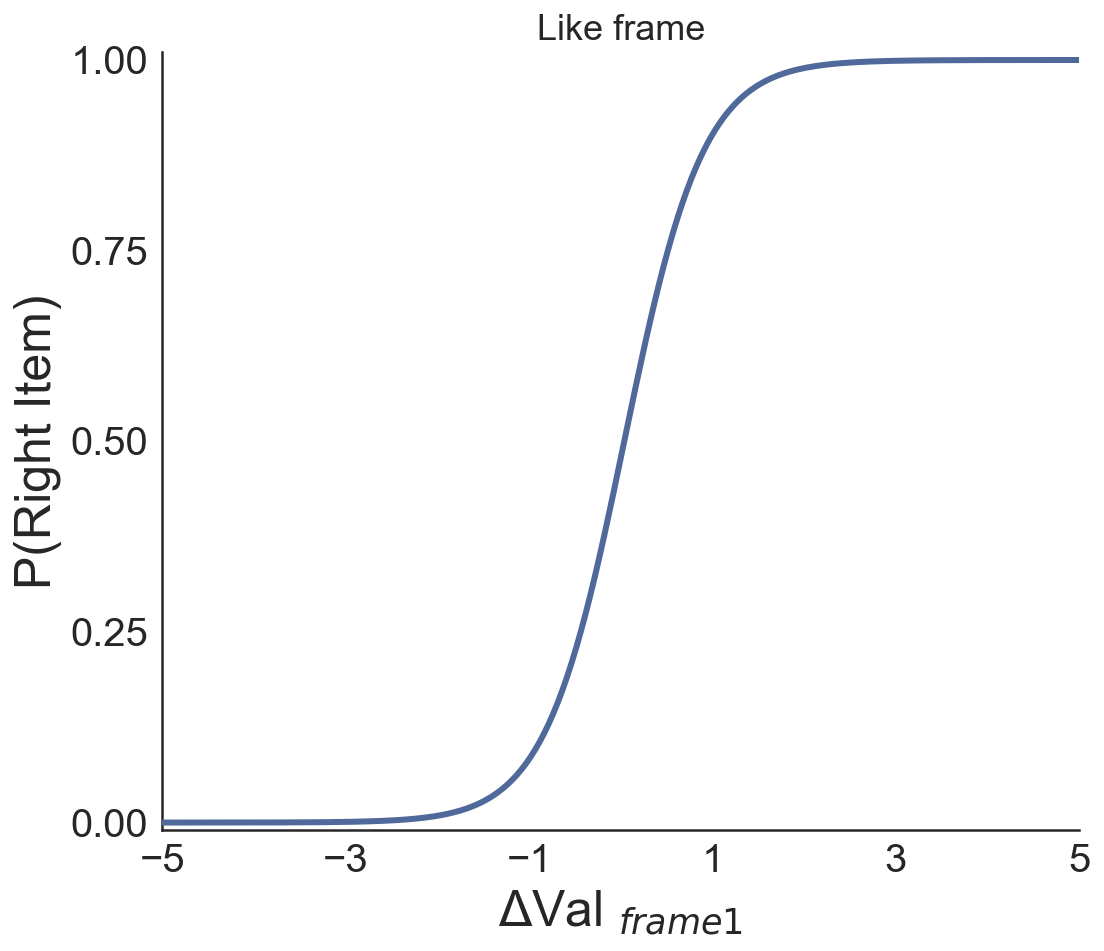

In [48]:
logisticplot_all( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

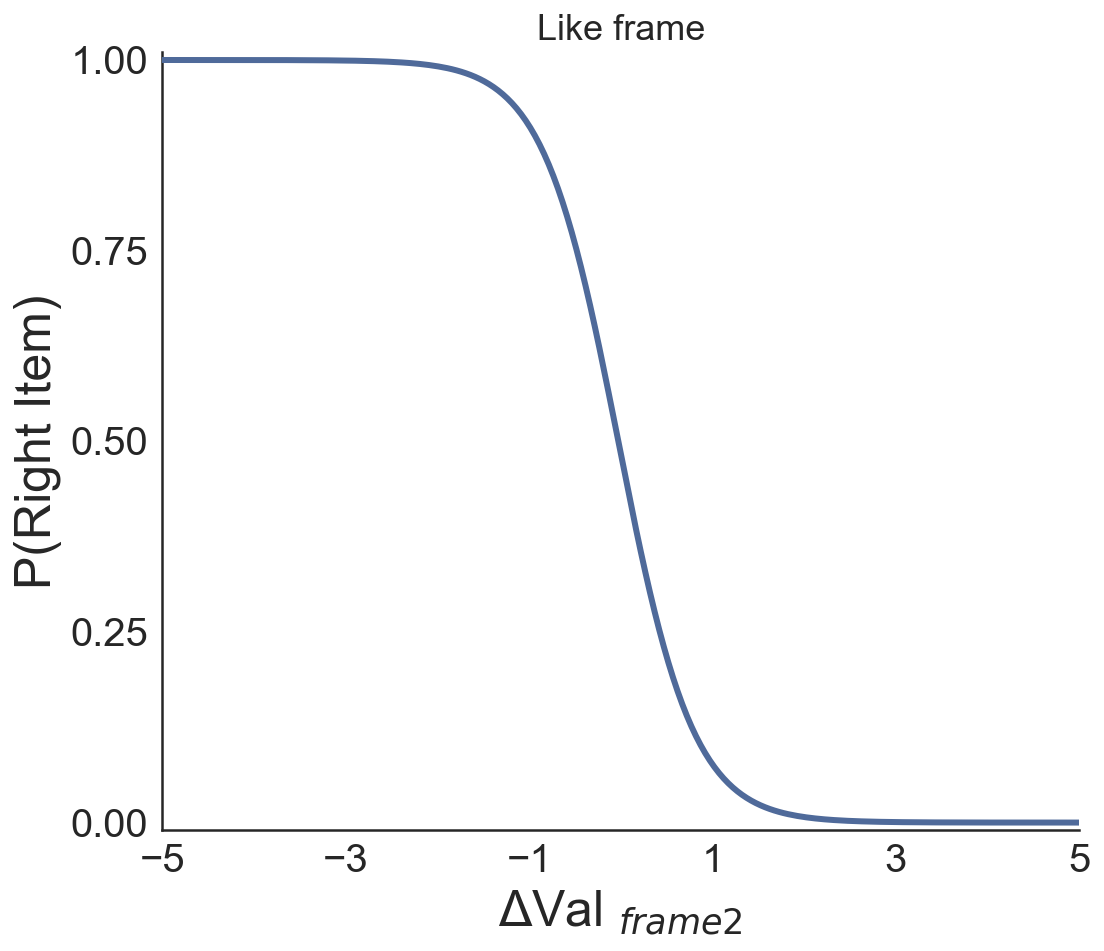

In [49]:
logisticplot_all( data=data_expL, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

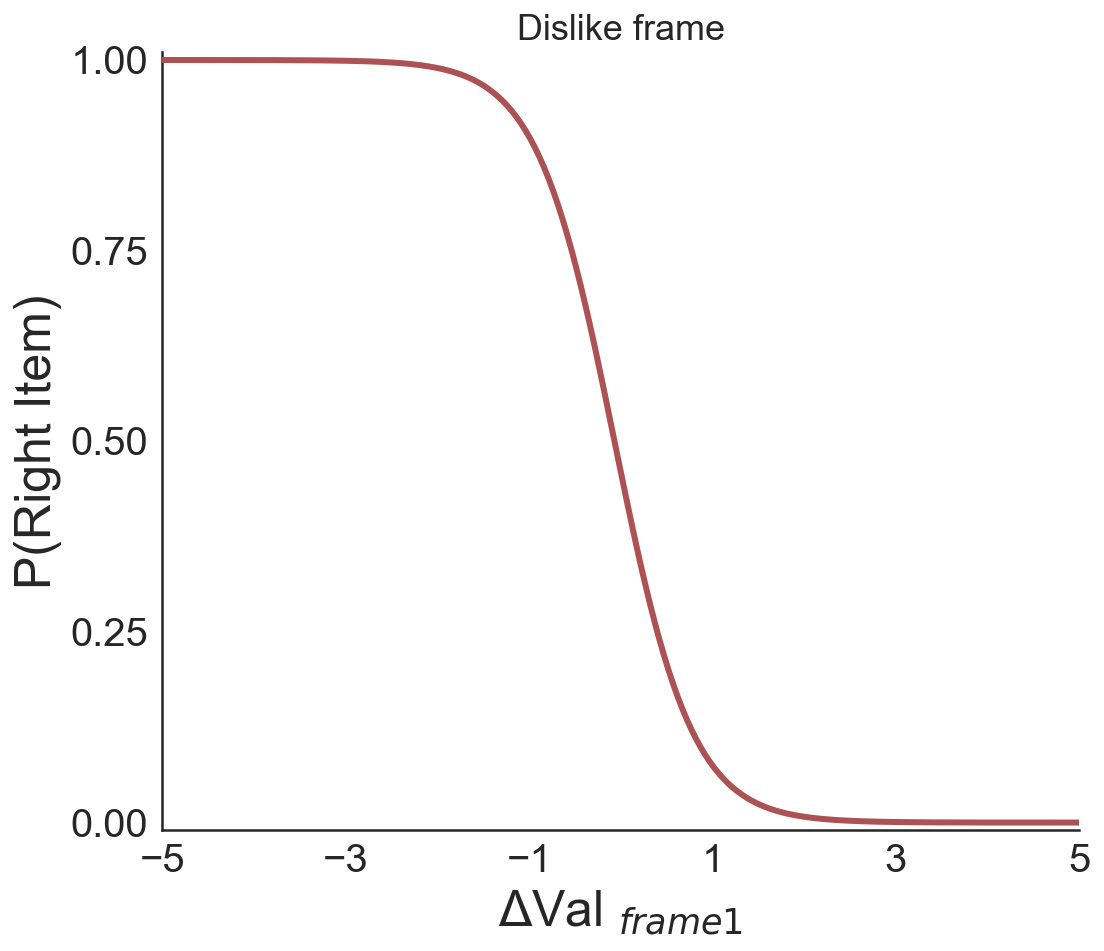

In [50]:
logisticplot_all( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

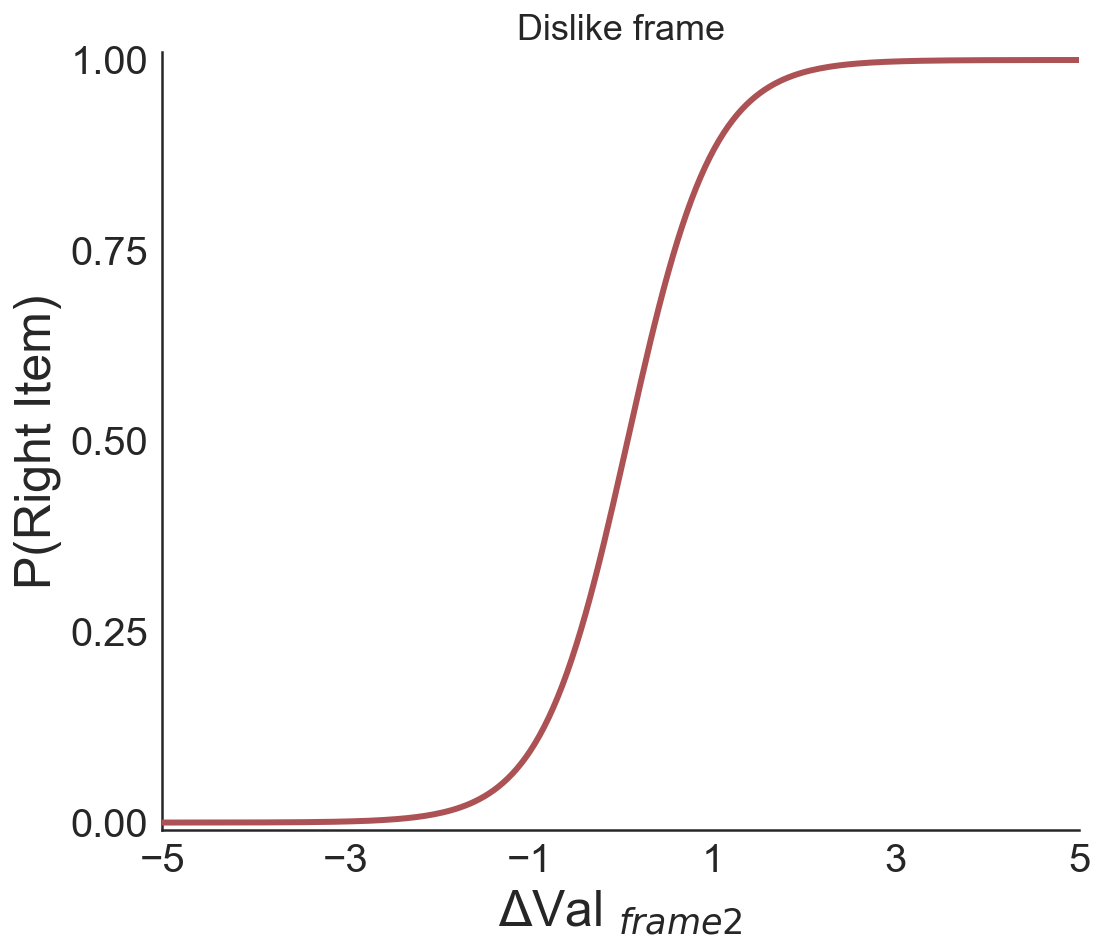

In [51]:
logisticplot_all( data=data_expD, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

# 6. (Preliminar)Regression analysis on Choice

In [52]:
%R -i data_exp1
data_exp1

index  trial  leftId  rightId  Frame   endTime  choice        RT  LRat1  \
0       0    0.0    21.0      4.0    2.0  7.508409     1.0  1.174838   50.0   
1       1    1.0    12.0     14.0    2.0  7.513930     1.0  0.780269   40.5   
2       2    2.0    20.0     19.0    2.0  7.515296     1.0  1.195317   50.0   
3       3    3.0     2.0      8.0    2.0  7.514498     1.0  0.247736   44.5   
4       4    4.0     4.0     21.0    1.0  7.514311     1.0  0.178482   28.5   
5       5    5.0    12.0     20.0    1.0  7.513606    -1.0  2.181133   40.5   
6       6    6.0    24.0     21.0    2.0  7.514916     1.0  3.361822   50.0   
7       7    7.0     2.0     32.0    2.0  7.513895     1.0  2.000413   44.5   
8       8    8.0    19.0      8.0    1.0  7.514563     1.0  3.298472    8.0   
9       9    9.0    24.0     21.0    1.0  7.514475     1.0  1.482191   50.0   
10     10   10.0     7.0     24.0    2.0  7.533371    -1.0  3.472894   24.5   
11     11   11.0    19.0     20.0    2.0  7.513676    -1.0  2.680498    8.0   
12     13   13.0    11.0     13.0    1.0  7.514578    -1.0  1.246365   21.5   
13     14   14.0     2.0      8.0    1.0  7.515374    -1.0  0.698316   44.5   
14     15   15.0    25.0     14.0    1.0  7.513834     1.0  1.079885   18.0   
15     16   16.0    32.0      2.0    1.0  7.515025     1.0  0.749102   31.0   
16     17   17.0    21.0      4.0    1.0  7.514161    -1.0  0.398966   50.0   
17     18   18.0    14.0     12.0    2.0  7.514242    -1.0  2.078667   27.5   
18     19   19.0    18.0     27.0    1.0  7.514450     1.0  1.547261   50.0   
19     21   21.0    12.0     20.0    2.0  7.514755    -1.0  1.616939   40.5   
20     22   22.0     6.0      7.0    1.0  7.514262    -1.0  2.146601   25.5   
21     23   23.0    32.0      5.0    1.0  7.514405    -1.0  0.913481   31.0   
22     24   24.0    24.0      7.0    1.0  7.513696    -1.0  1.265961   50.0   
23     25   25.0     8.0      2.0    2.0  7.514479    -1.0  0.980972   10.5   
24     26   26.0    27.0     18.0    1.0  7.514286     1.0  1.595422   46.0   
25     27   27.0    20.0     12.0    2.0  7.514039    -1.0  1.414524   50.0   
26     28   28.0     4.0     21.0    2.0  7.513827    -1.0  0.532735   28.5   
27     29   29.0    18.0     25.0    1.0  7.514261    -1.0  1.414328   50.0   
28     30   30.0     7.0      6.0    1.0  7.514328    -1.0  0.748972   24.5   
29     31   31.0    32.0      2.0    2.0  7.514388     1.0  0.547924   31.0   
..    ...    ...     ...      ...    ...       ...     ...       ...    ...   
562   690   50.0    19.0     26.0    1.0  7.001664     1.0  1.769790   10.5   
563   691   51.0     1.0      8.0    1.0  7.015868    -1.0  1.386901   39.5   
564   692   52.0    28.0      3.0    1.0  7.001753    -1.0  1.769414   40.5   
565   693   53.0    28.0      4.0    1.0  7.001830    -1.0  1.737034   40.5   
566   694   54.0    30.0      8.0    1.0  7.001238     1.0  1.501930   11.0   
567   695   55.0    32.0     12.0    1.0  7.001601     1.0  2.152460   33.0   
568   696   56.0    27.0      7.0    1.0  7.001791    -1.0  1.535228   37.5   
569   697   57.0    18.0     10.0    1.0  7.001257    -1.0  1.736804   45.0   
570   698   58.0    16.0     15.0    1.0  7.001992     1.0  1.768663   15.0   
571   699   59.0    19.0      7.0    1.0  7.014666     1.0  2.185105   10.5   
572   700   60.0     3.0     28.0    2.0  7.013495    -1.0  2.636421   27.0   
573   701   61.0    19.0     26.0    2.0  7.001869    -1.0  1.553245   10.5   
574   702   62.0    28.0      3.0    2.0  7.001398     1.0  1.954193   40.5   
575   703   63.0    15.0     16.0    2.0  7.001737    -1.0  1.602325   36.0   
576   704   64.0    11.0     18.0    2.0  7.001559    -1.0  1.785488   10.0   
577   705   65.0    29.0     12.0    2.0  7.001700    -1.0  1.884607    1.5   
578   706   66.0    27.0      9.0    2.0  7.001709     1.0  1.553095   37.5   
579   707   67.0     9.0     27.0    2.0  7.001774    -1.0  1.886913   26.5   
580   708   68.0    32.0     12.0    2.0  7.001154    

In [53]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$Frame=='1'), ]
data_exp1_DisLike <- data_exp1[ which(data_exp1$Frame=='2'), ]

[1] "Like BIC:"
[1] 262.8113
[1] "DisLike BIC:"
[1] 262.7032


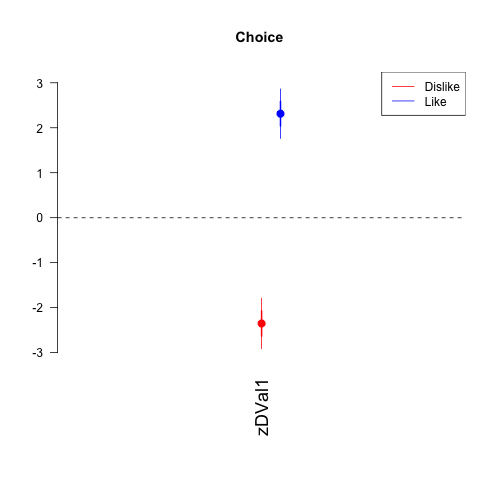

In [54]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 248.4178
[1] "DisLike BIC:"
[1] 268.3249


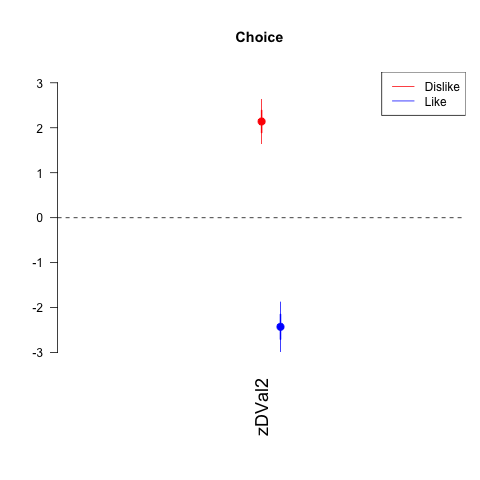

In [55]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### As expected, we observe that the rating given in dislike frame (Frame 2) accounts for the most disliked option, therefore, it predicts the choice maintaing the sign.

[1] "Like BIC:"
[1] 264.6973
[1] "DisLike BIC:"
[1] 268.0692


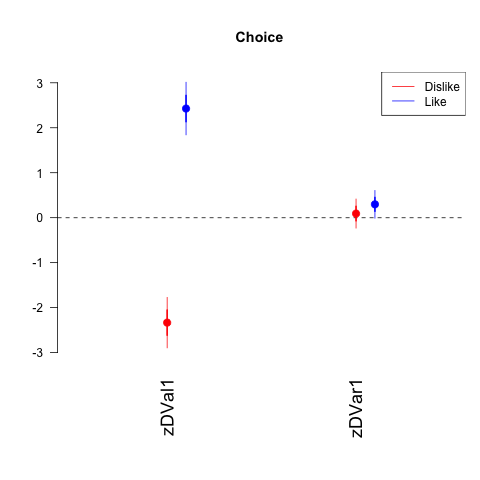

In [56]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 254.1081
[1] "DisLike BIC:"
[1] 273.9554


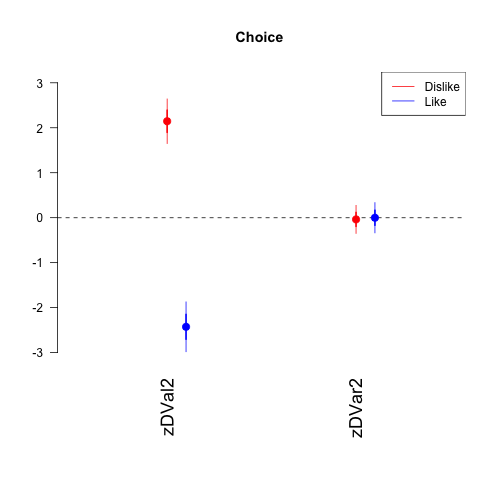

In [57]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### the difference in variability between items seems to not influence choice

## Since I don't have confidence I try to predict RT

[1] "Like BIC:"
[1] 845.5632
[1] "DisLike BIC:"
[1] 837.089


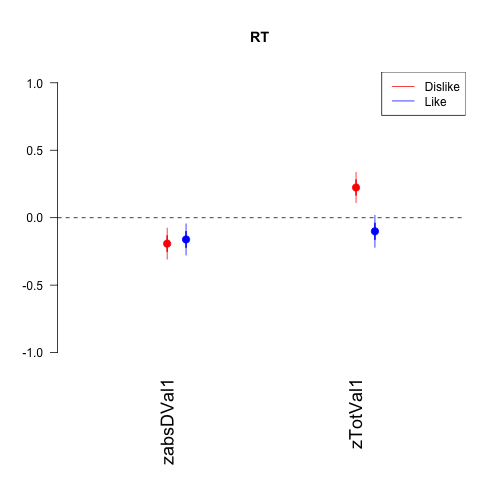

In [58]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 849.1562
[1] "DisLike BIC:"
[1] 835.2559


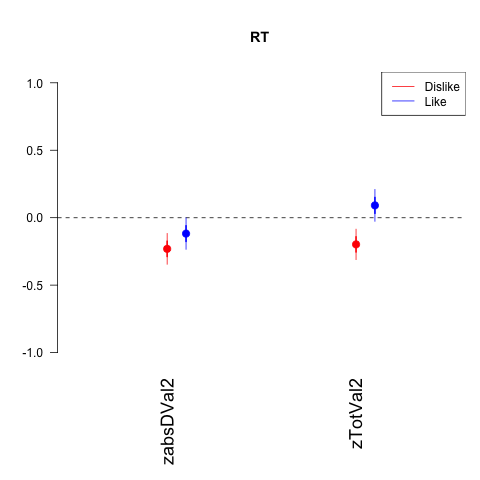

In [59]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### Interesting how we observe a flip for total value, using RT as a proxy for confidence (i.e. if I'm more confident I have lower reaction time. In like frame, if I have higher TotVal, I have lower RT --> high confidence; but in dislike, higher TotVal means higher RT --> lower confidence)  

-----------------------------------------------------

# Import toolboxes and functions

In [3]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color=modlowcol, linewidth=3, zorder=5,linestyle='-')

   # #Plotting the binned data
   # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
   # # determine the x coordinates
   # x_cords= data.groupby('DVBin2')[xaxis].mean()
    
   # # determine low y coordinates
   # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine low y standard errors
   # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
   # # determine high y coordinates
   # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine high y standard errors
   # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
   # # plot the low points
   # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
   # # plot low error bars
   # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
   # # plot the high points
   # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
   # # plot high error bars
   # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [5]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    fig = figure(figsize=(20,20))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
 
    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)

            data_in = data.loc[data['Part'] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [6]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [7]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(40,10))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 25)


In [8]:
def corrPlotSimple(data_exp1, x_variable,x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_exp1, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    x=data_exp1[x_variable]
    y=data_exp1[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Red', lw=3)
    sns.despine()
    
    results = pearsonr(data_exp1[x_variable], data_exp1[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

In [11]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [10]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)